# Final Project, Option #2: Survey analysis
## Making Products Count: Data Science for Product Management, S22

Kelly McManus, kellymcm
Krishnaraj Pawooskar, kpawoosk
Nicholas (Cole) Thomas, nhthomas
Davidson Siga, dsiga
Michael Yang, myang3

March 4, 2022

In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

!pip install yellowbrick
from yellowbrick.model_selection import feature_importances
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Run if you're using Colab and comment if you're not
# from google.colab import drive
# drive.mount('/content/drive')

# Please store the required data(deloitte data) in an accessable location

In [4]:
# Drive folder paths. If you run on your laptop, change path to match your drive structure
# Folder path variable needs to be updated

# If on drive
# folderPath = "/content/drive/" 

# If in local
folderPath=""

path9 = folderPath + "DDS9_Data_Extract_with_labels.xlsx"
path10 = folderPath + "DDS10_Data_Extract_with_labels.xlsx"
path11 = folderPath + "DDS11_Data_Extract_with_labels.xlsx"

df9 = pd.read_excel(path9)
df10 = pd.read_excel(path10)
df11 = pd.read_excel(path11)

# Exploratory Data Analysis (EDA)

In [5]:
# Cole & Kelly 

def readData(filename):
    return pd.read_excel(str(filename))

def renameCol(df, oldText, newText):
    df.rename(columns={oldText : newText}, inplace = True)

def remapValues():
    return ''

def plotHist(df0, df1, df2, colName):
    fig, ax = plt.subplots(1,3, figsize = (30, 10))
    ax[0].hist(df0[colName], color = 'orange')
    ax[0].title.set_text(str('2009 ' + colName + ' Histogram'))
    ax[1].hist(df1[colName], color = 'gray')
    ax[1].title.set_text(str('2010 ' + colName + ' Histogram'))
    ax[2].hist(df2[colName], color = 'green')
    ax[2].title.set_text(str('2011 ' + colName + ' Histogram'))
    fig.tight_layout(pad = 3.0)
    
def categoricalBarPlots(df0, df1, df2, colName):
    fig, axes = plt.subplots(3, 1, figsize=(15,20))
    df0[colName].value_counts().plot.barh(ax=axes[0], title='2009', color = 'orange')
    df1[colName].value_counts().plot.barh(ax=axes[1], title='2010', color = 'gray')
    df2[colName].value_counts().plot.barh(ax=axes[2], title='2011', color = 'green')
    plt.show()

## Descriptive statisitics 

The raw datasets do not have too many truely numeric values that we can analyze descriptive statistics. Many of the values are rankings of 1-3 or percentages.

In [6]:
df9.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
record - Record number,2076.0,1869.709056,1398.205064,1.0,746.750000,1485.500000,2826.250000,5243.0
"Q1r1 - To begin, what is your age?",2076.0,42.560694,19.837428,14.0,25.000000,40.000000,61.000000,118.0
"Q11r1 - Flat panel television - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. The",990.0,2.047475,0.811176,1.0,1.000000,2.000000,3.000000,3.0
"Q11r2 - Digital video recorder (DVR) - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to ran",210.0,2.452381,0.670727,1.0,2.000000,3.000000,3.000000,3.0
"Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking ea",56.0,2.375000,0.727699,1.0,2.000000,3.000000,3.000000,3.0
"Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by",10.0,2.300000,0.823273,1.0,2.000000,2.500000,3.000000,3.0
"Q11r5 - Blu-ray disc player/DVD player - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to r",124.0,2.516129,0.656226,1.0,2.000000,3.000000,3.000000,3.0
"Q11r6 - Gaming console - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish t",305.0,2.337705,0.769946,1.0,2.000000,3.000000,3.000000,3.0
"Q11r7 - Portable video game player - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each i",63.0,2.460317,0.667818,1.0,2.000000,3.000000,3.000000,3.0
"Q11r8 - Computer network/router in your home for wireless computer/laptop usage - Of the products you indicated you own, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most val",411.0,2.333333,0.714541,1.0,2.000000,2.000000,3.000000,3.0


In [7]:
df10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
record - Record number,2205.0,3823.576417,3754.093175,1.000000,1243.000000,1994.000000,5351.000000,13026.000000
"Q1r1 - To begin, what is your age?",2205.0,40.968707,18.643163,14.000000,25.000000,37.000000,59.000000,87.000000
"Q11r1 - Flat panel television - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. Th",802.0,2.125935,0.791876,1.000000,1.000000,2.000000,3.000000,3.000000
"Q11r2 - Digital video recorder (DVR) - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to ra",171.0,2.497076,0.663097,1.000000,2.000000,3.000000,3.000000,3.000000
"Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio",106.0,2.264151,0.784394,1.000000,2.000000,2.000000,3.000000,3.000000
"Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. M",47.0,2.170213,0.867759,1.000000,1.000000,2.000000,3.000000,3.000000
"Q11rNew1 - Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription) - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most value",62.0,2.209677,0.832478,1.000000,1.250000,2.000000,3.000000,3.000000
"Q11r5 - Blu-ray disc player/DVD player - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to",127.0,2.496063,0.711292,1.000000,2.000000,3.000000,3.000000,3.000000
"Q11r6 - Gaming console - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish",421.0,2.239905,0.766516,1.000000,2.000000,2.000000,3.000000,3.000000
"Q11r7 - Portable video game player - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each",71.0,2.281690,0.831231,1.000000,2.000000,3.000000,3.000000,3.000000


In [8]:
df11.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
record - Record number,2131.0,1567.903332,970.273503,3.000000,762.500000,1459.000000,2318.000000,3673.000000
"Q1r1 - To begin, what is your age?",2131.0,44.448616,21.138767,14.000000,25.500000,39.000000,67.000000,99.000000
"Q11r1 - Flat panel television - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. Th",734.0,2.088556,0.789809,1.000000,1.000000,2.000000,3.000000,3.000000
"Q11r2 - Digital video recorder (DVR) - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to ra",159.0,2.339623,0.786196,1.000000,2.000000,3.000000,3.000000,3.000000
"Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio",110.0,2.318182,0.777337,1.000000,2.000000,3.000000,3.000000,3.000000
"Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. M",76.0,2.342105,0.740318,1.000000,2.000000,2.500000,3.000000,3.000000
"Q11rNew1 - Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription) - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most value",84.0,2.142857,0.762729,1.000000,2.000000,2.000000,3.000000,3.000000
"Q11r5 - Blu-ray disc player/DVD player - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to",154.0,2.344156,0.735468,1.000000,2.000000,2.500000,3.000000,3.000000
"Q11r6 - Gaming console - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish",378.0,2.113757,0.820992,1.000000,1.000000,2.000000,3.000000,3.000000
"Q11r7 - Portable video game player - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each",79.0,2.164557,0.807503,1.000000,1.500000,2.000000,3.000000,3.000000


We can analyze age, which appears to have a mean in the 40s in all three dataset, but a median in the 30s. This indicates that their is a slight left skew of our data with regards to age. This makes sense as age media is typically targeted towards younger audiences. 

## Plots

(Double click on graphs to zoom in.)

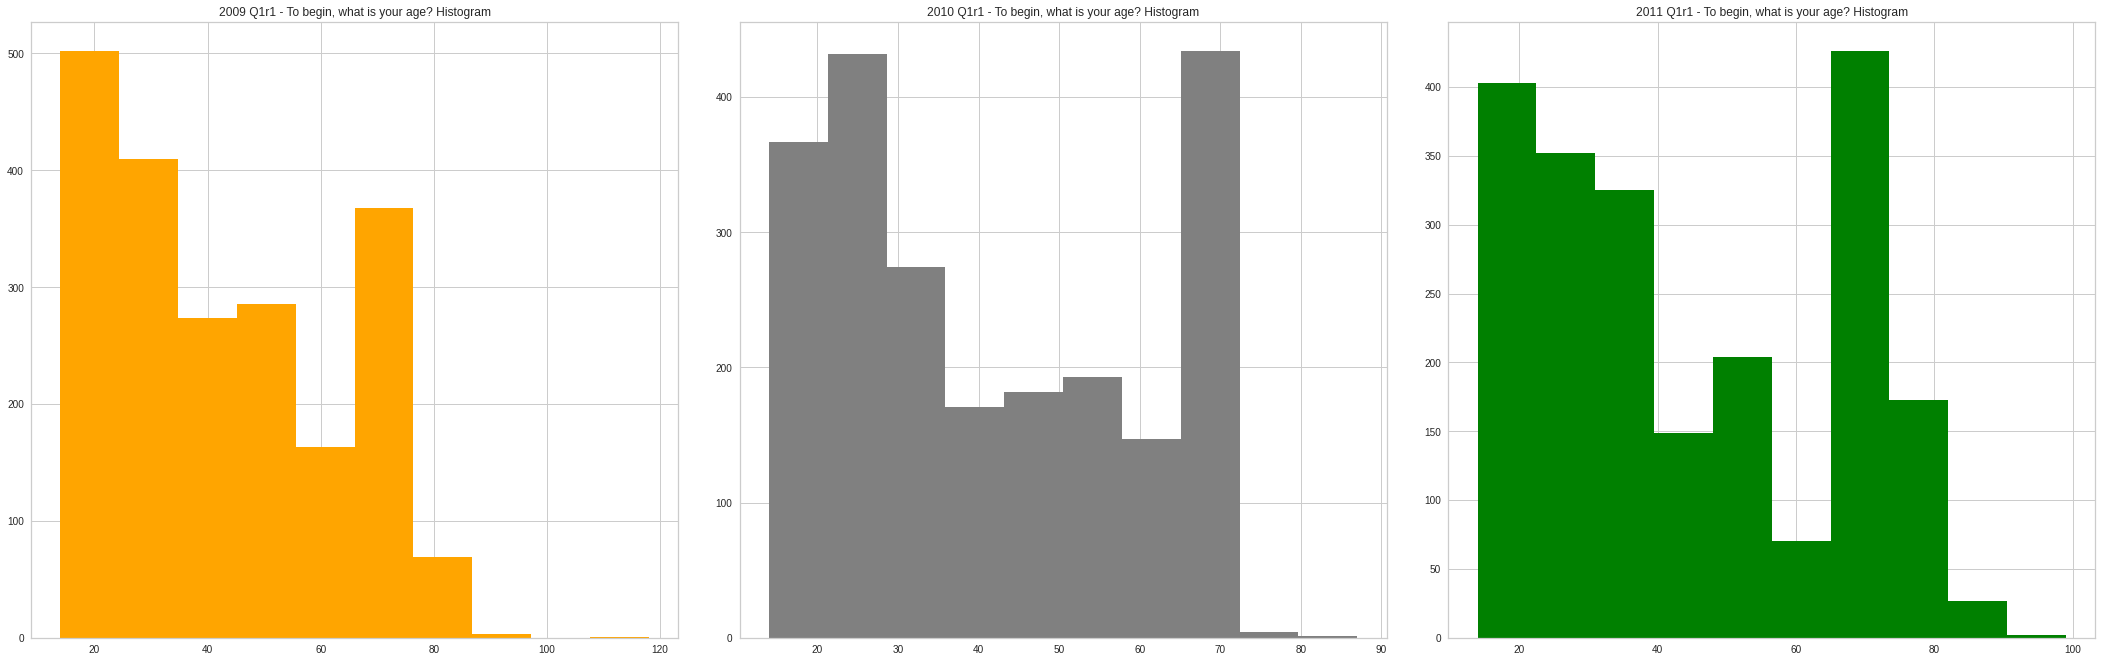

In [9]:
# Plot histogram of age
plotHist(df9, df10, df11, 'Q1r1 - To begin, what is your age?')

Above we observe the left skew in dataset 9 and in 10 and 11 we see a large spike in consumers ages 60-70. 

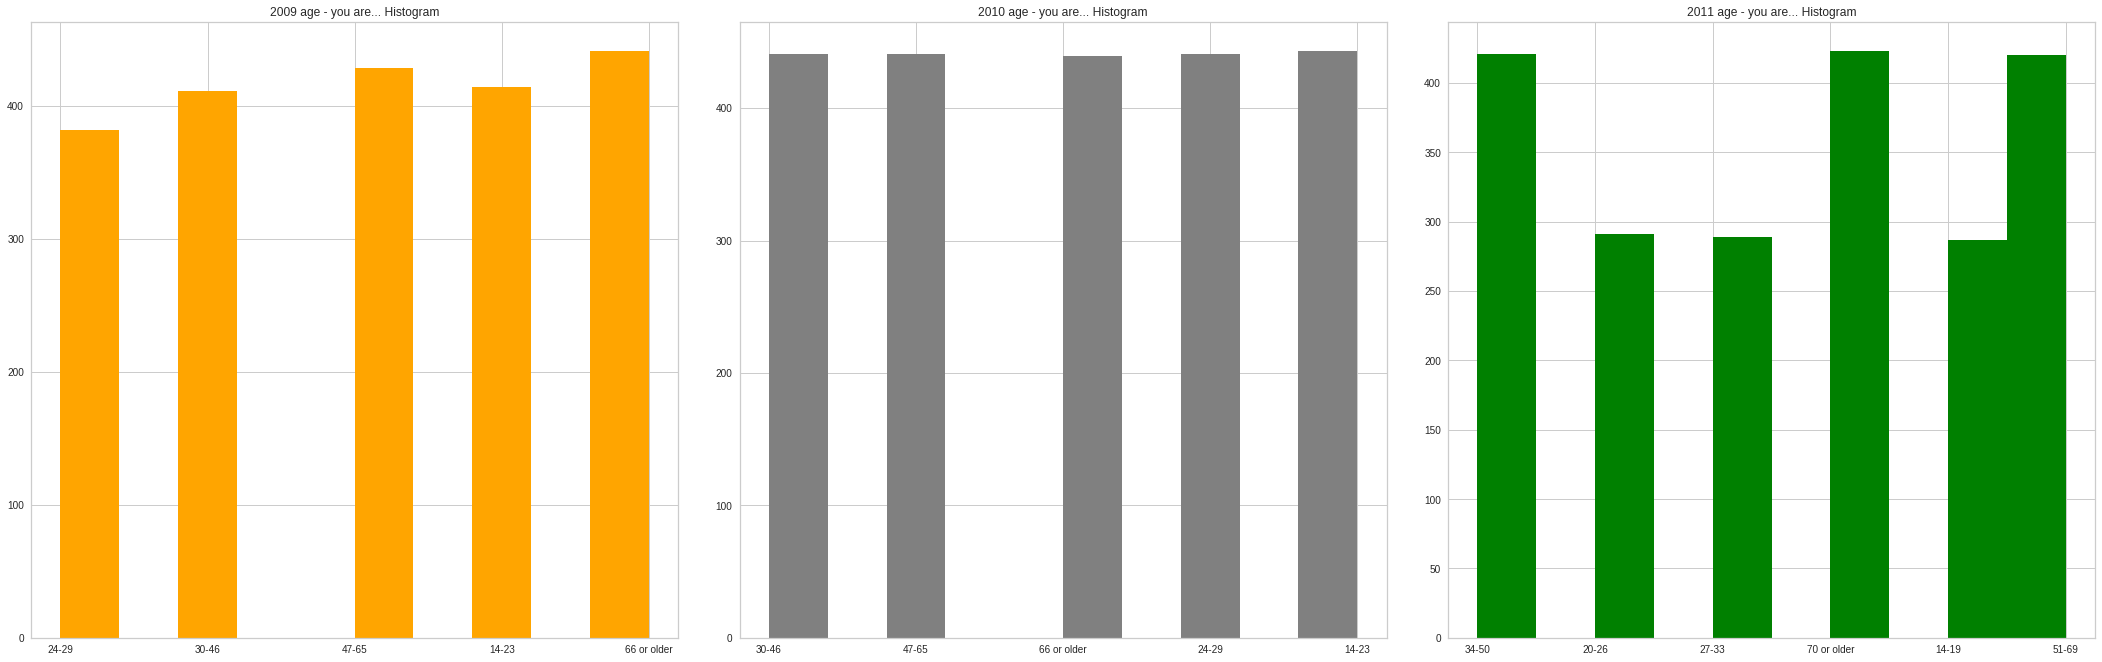

In [10]:
# Plot histogram of age buckets 
plotHist(df9, df10, df11, 'age - you are...')

The spread of ages by buckets is generally even. 

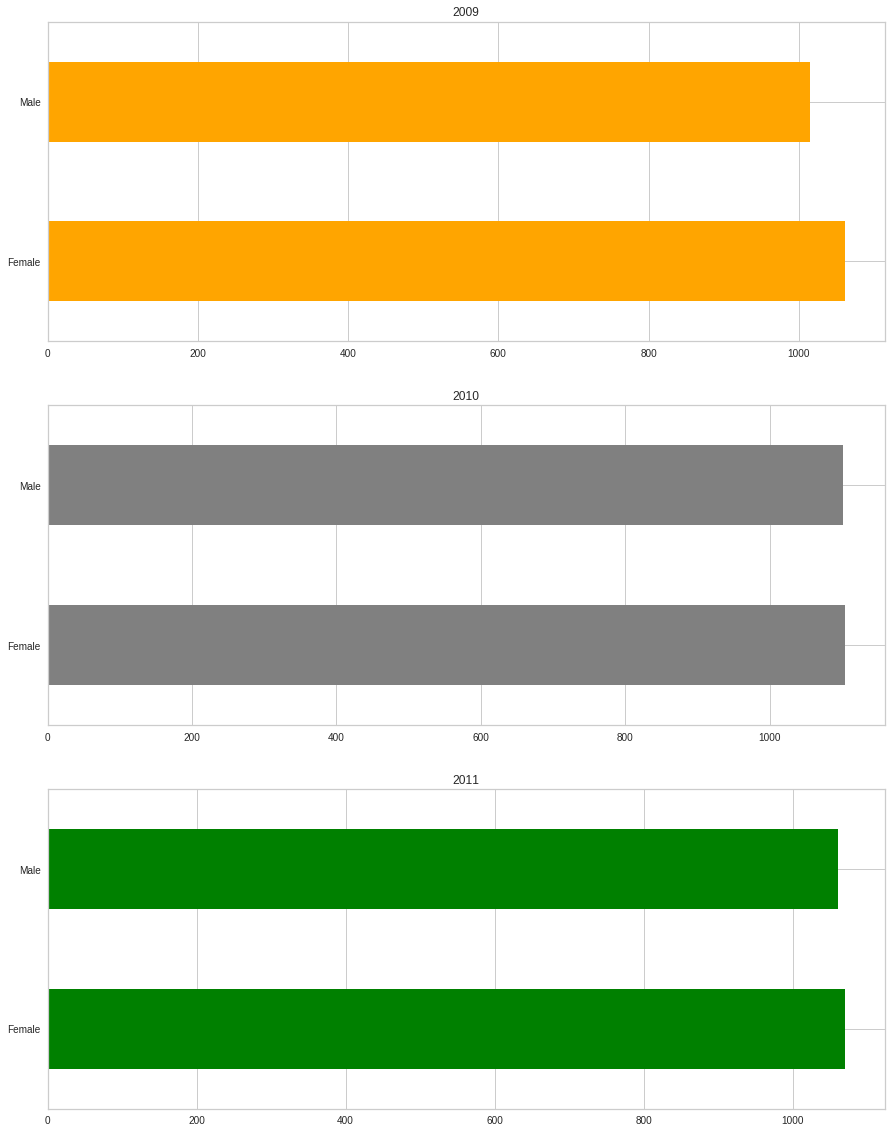

In [11]:
# Plot bar chart of gender
categoricalBarPlots(df9, df10, df11, 'Q4 - What is your gender?')

All three datasets are evenly distributed by male and female.

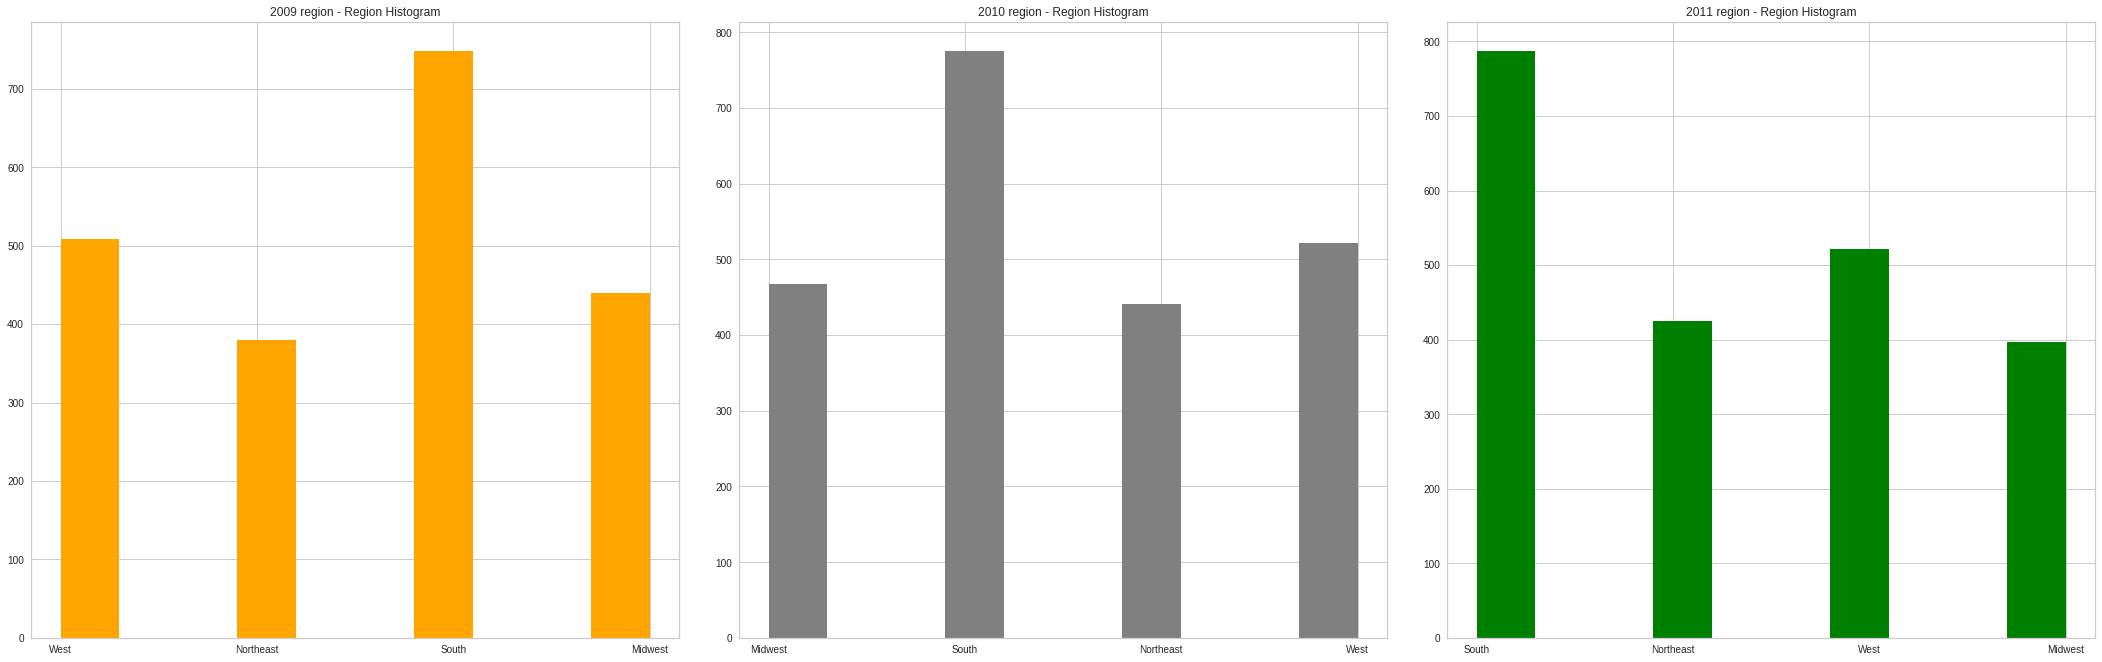

In [12]:
# Plot by region
plotHist(df9, df10, df11, 'region - Region')

The regions are generally even as well. After we combine all three datasets, the regions will be even. 

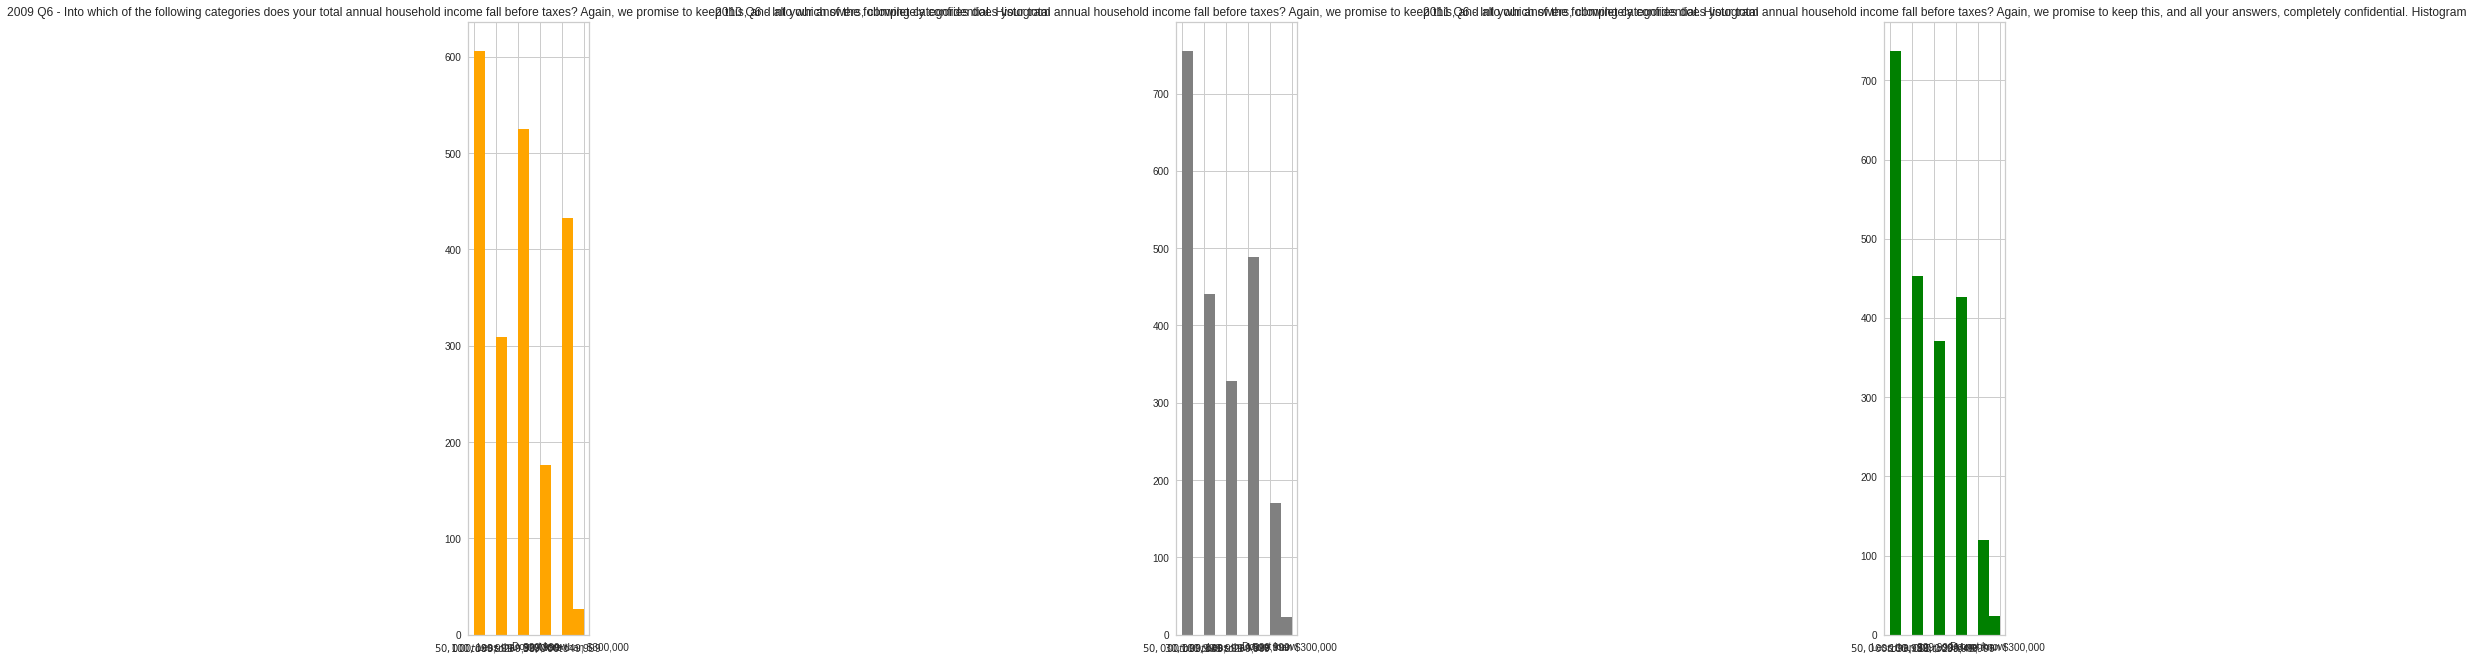

In [13]:
# Plot income
plotHist(df9, df10, df11, 'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.')

The majority of observations have an income in the brakets of \$50-100k or \$0-30k. The first bucket is middle class that may have disposible income, but the $0-30k bucket are those with less disposible income to spend on streaming and media services. 

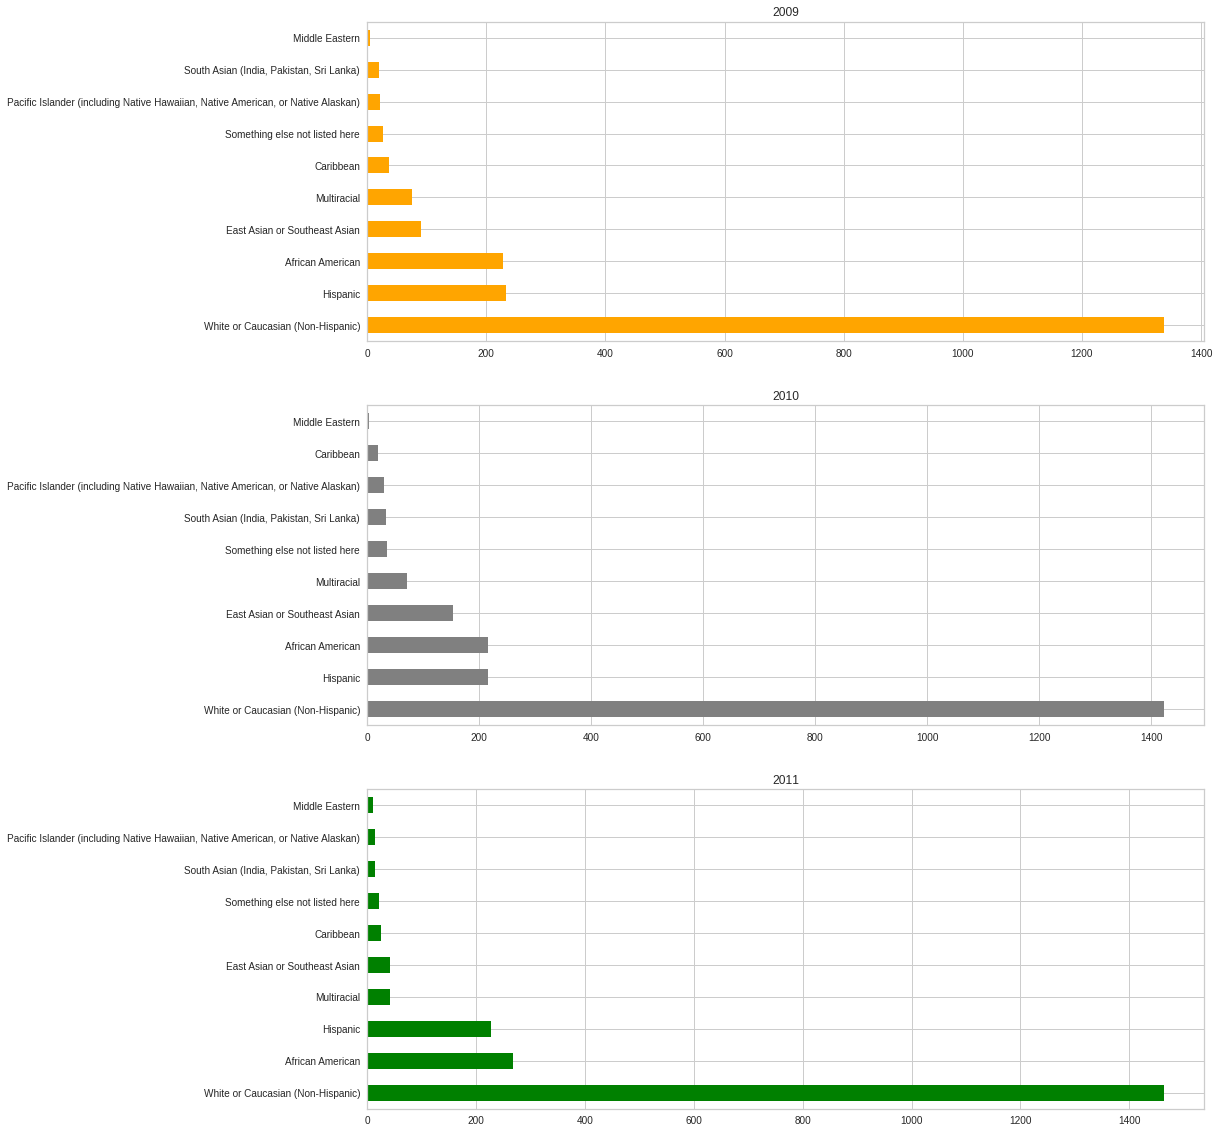

In [14]:
# Plot ethnicity 
categoricalBarPlots(df9, df10, df11, 'Q5 - Which category best describes your ethnicity?')

In [15]:
# Percentage of individuals by ethnicity
print('Year: 2009\n')
print(df9['Q5 - Which category best describes your ethnicity?'].value_counts() / len(df9['Q5 - Which category best describes your ethnicity?']))

Year: 2009

White or Caucasian (Non-Hispanic)                                                   0.644509
Hispanic                                                                            0.112235
African American                                                                    0.109827
East Asian or Southeast Asian                                                       0.043834
Multiracial                                                                         0.036609
Caribbean                                                                           0.017823
Something else not listed here                                                      0.013006
Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)    0.010116
South Asian (India, Pakistan, Sri Lanka)                                            0.009634
Middle Eastern                                                                      0.002408
Name: Q5 - Which category best describes your ethnicity?, 

In [16]:
print('Year: 2010\n')
print(df10['Q5 - Which category best describes your ethnicity?'].value_counts() / len(df9['Q5 - Which category best describes your ethnicity?']))

Year: 2010

White or Caucasian (Non-Hispanic)                                                   0.685453
Hispanic                                                                            0.104046
African American                                                                    0.104046
East Asian or Southeast Asian                                                       0.074181
Multiracial                                                                         0.034682
Something else not listed here                                                      0.017341
South Asian (India, Pakistan, Sri Lanka)                                            0.016378
Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)    0.014933
Caribbean                                                                           0.009634
Middle Eastern                                                                      0.001445
Name: Q5 - Which category best describes your ethnicity?, 

In [17]:
print('Year: 2011\n')
print(df11['Q5 - Which category best describes your ethnicity?'].value_counts() / len(df9['Q5 - Which category best describes your ethnicity?']))

Year: 2011

White or Caucasian (Non-Hispanic)                                                   0.705202
African American                                                                    0.129094
Hispanic                                                                            0.109827
Multiracial                                                                         0.020713
East Asian or Southeast Asian                                                       0.020231
Caribbean                                                                           0.012042
Something else not listed here                                                      0.010116
South Asian (India, Pakistan, Sri Lanka)                                            0.007225
Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)    0.007225
Middle Eastern                                                                      0.004817
Name: Q5 - Which category best describes your ethnicity?, 

All three datasets are majoirty made up of individuals who are white. This is indicative of the overall ethnicity divisions in the US, however we must be clear that our algorithms have this split in our data and the algorithm should only be used on datasets or communities with a similar ethnicity divide. Apply these predictions on communities that have more Black individuals or more white individuals will led to biased and incorrect outcomes. 

## Streaming behaviour 

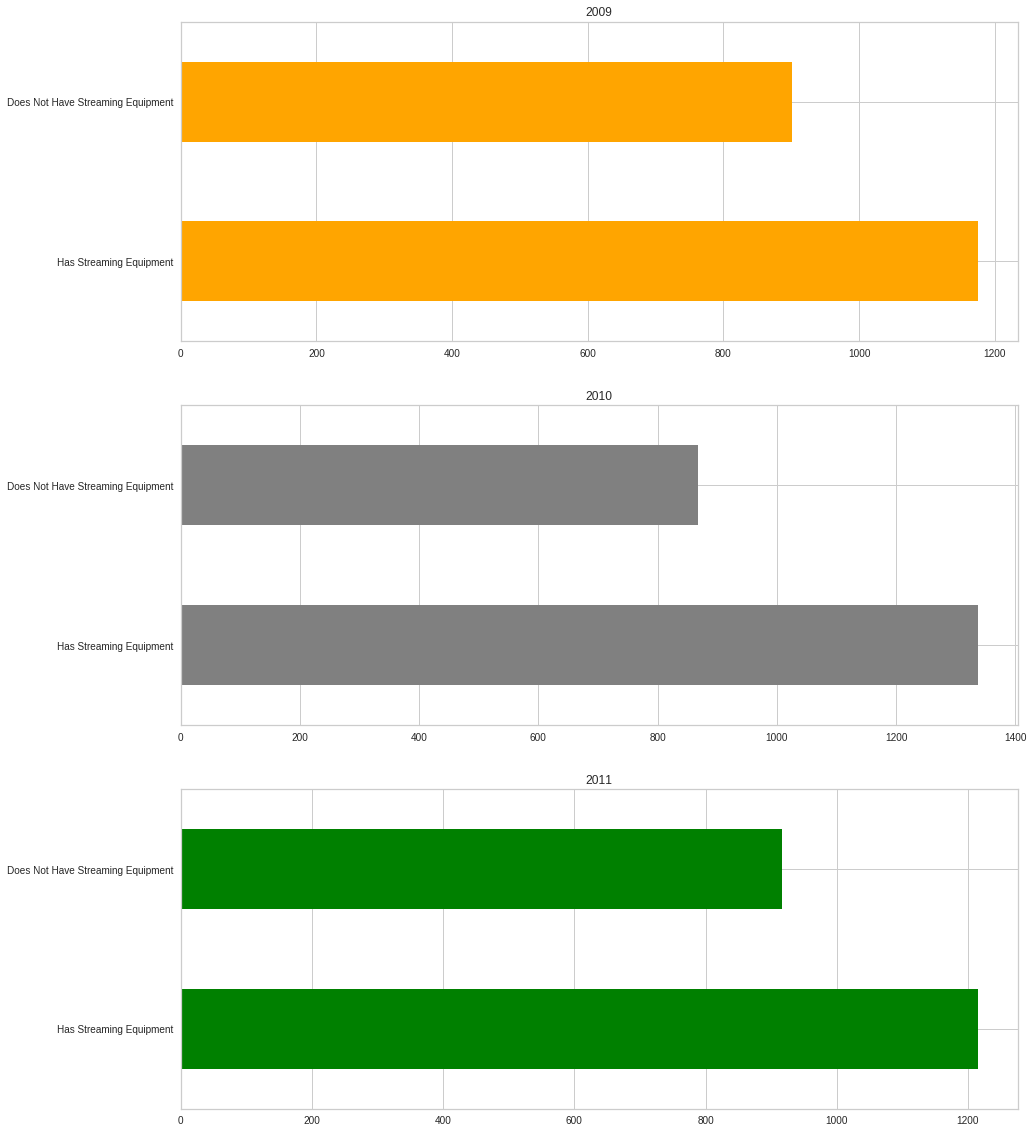

In [18]:
# Q8: Plot user behavior, streaming equipment by household 

def streamingEquipment(df):
    if ((df['Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box'] == 'Yes')
        or (df['Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob'] == 'Yes') 
        or (df['Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console'] == 'Yes') 
        or (df['Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player'] == 'Yes')):
        return 'Has Streaming Equipment'
    else:
        return 'Does Not Have Streaming Equipment'

df9['hasStreamingEquip'] = df9.apply(streamingEquipment, axis = 1)
df10['hasStreamingEquip'] = df10.apply(streamingEquipment, axis = 1)
df11['hasStreamingEquip'] = df11.apply(streamingEquipment, axis = 1)

categoricalBarPlots(df9, df10, df11, 'hasStreamingEquip')

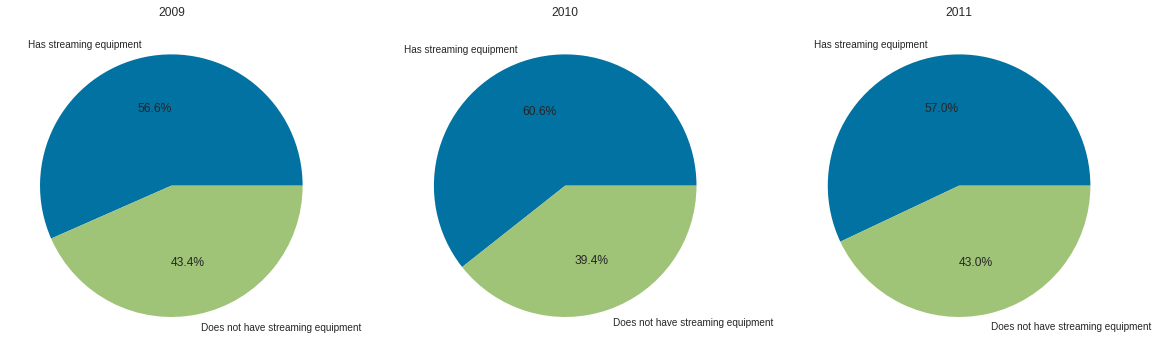

In [19]:
labels = ['Has streaming equipment', 'Does not have streaming equipment']
fig1, ax = plt.subplots(1, 3, figsize=(20,20))

ax[0].pie(df9['hasStreamingEquip'].value_counts(), labels=labels, autopct='%1.1f%%')
ax[1].pie(df10['hasStreamingEquip'].value_counts(), labels=labels, autopct='%1.1f%%')
ax[2].pie(df11['hasStreamingEquip'].value_counts(), labels=labels, autopct='%1.1f%%')

ax[0].set_title('2009')
ax[1].set_title('2010')
ax[2].set_title('2011')
plt.show()

Over the 3 years, the amount of streaming equipment in households as stayed about a consistant 60%:40% split. 

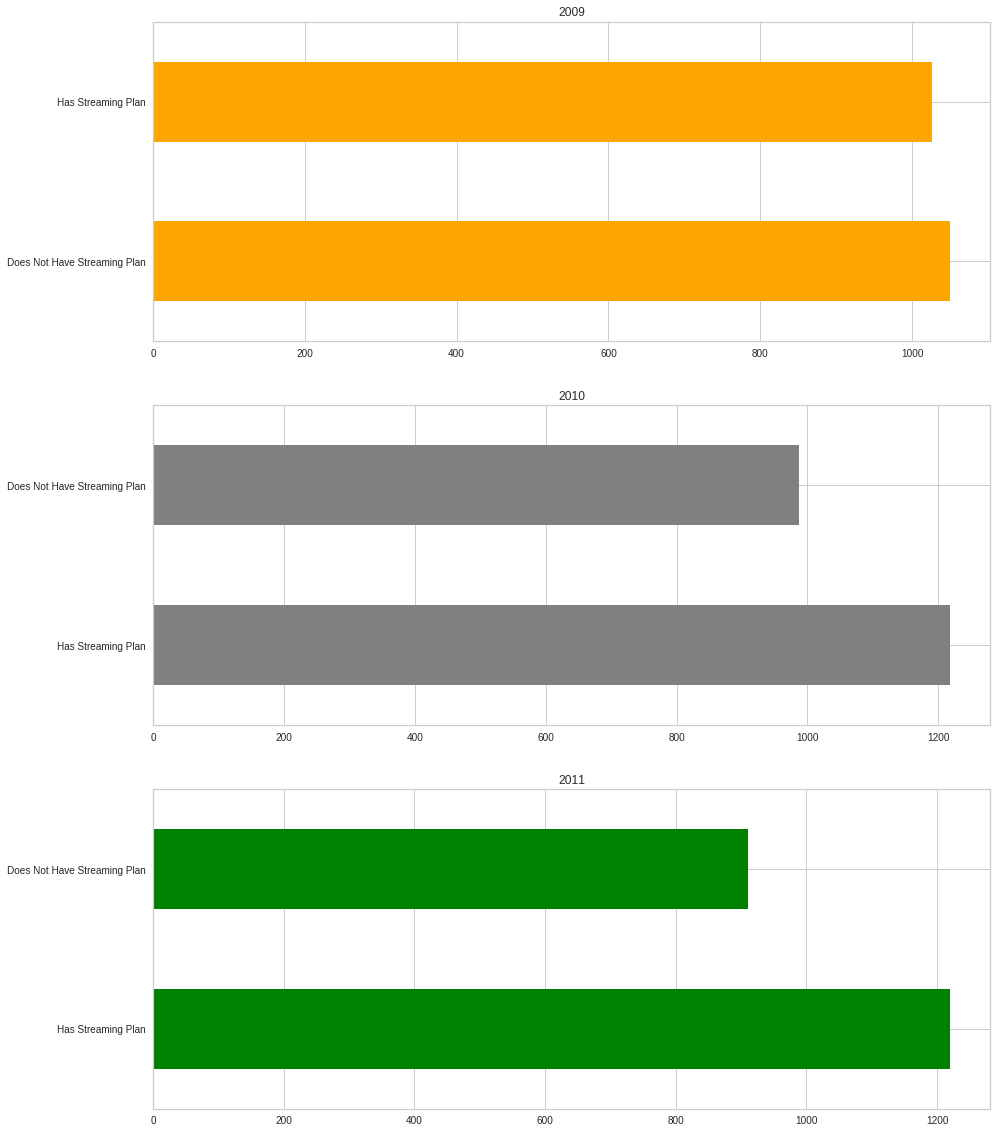

In [20]:
# Q26: Pay for streaming plan

def streamingPlan(df): 
    if ((df['Q26 - Which of the following subscriptions does your household purchase?-Streaming music service'] == 'Yes')
        or (df['Q26 - Which of the following subscriptions does your household purchase?-Streaming video service'] == 'Yes') 
        or (df['Q26 - Which of the following subscriptions does your household purchase?-Gaming'] == 'Yes')):
        return 'Has Streaming Plan'
    else:
        return 'Does Not Have Streaming Plan'

df9['hasStreamingPlan'] = df9.apply(streamingPlan, axis = 1)
df10['hasStreamingPlan'] = df10.apply(streamingPlan, axis = 1)
df11['hasStreamingPlan'] = df11.apply(streamingPlan, axis = 1)

categoricalBarPlots(df9, df10, df11, 'hasStreamingPlan')

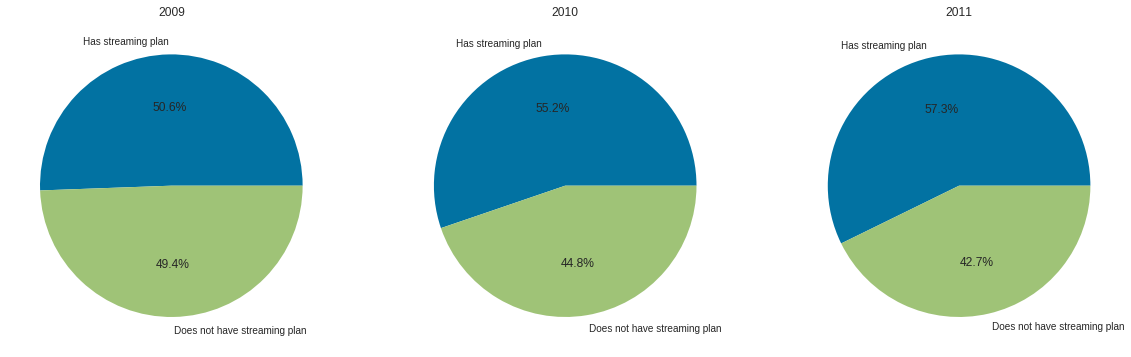

In [21]:
labels = ['Has streaming plan', 'Does not have streaming plan']
fig1, ax = plt.subplots(1, 3, figsize=(20,20))

ax[0].pie(df9['hasStreamingPlan'].value_counts(), labels=labels, autopct='%1.1f%%')
ax[1].pie(df10['hasStreamingPlan'].value_counts(), labels=labels, autopct='%1.1f%%')
ax[2].pie(df11['hasStreamingPlan'].value_counts(), labels=labels, autopct='%1.1f%%')

ax[0].set_title('2009')
ax[1].set_title('2010')
ax[2].set_title('2011')
plt.show()

Contrary to the streaming equipment, the percentage of household that pay for a streaming plan has increased each year from 50% to 57%. This is align with the market data and industry trends observed in the IBISWorld report that see consistant streaming industry growth since 2010. 

## Consumers top services

The top services that consumers consumers purchase are: 
1. Home internet
2. Pay TV
3. Mobile data

In [22]:
# Q36: Of the services you indicated your household purchases, which [totalcount] do you value the most?

def findTopServices(df, titleName):
    # Extract Q36 columns
    cols = [col for col in df.columns if 'Q36' in col]
    df36 = df[cols]

    # Rename column names
    mapping = {
        df36.columns[0]: 'Pay TV'
        , df36.columns[1]: 'Home internet'
        , df36.columns[2]: 'Landline telephone'
        , df36.columns[3]: 'Mobile voice'
        , df36.columns[4]: 'Mobile data plan'
        , df36.columns[5]: 'Streaming video service'
        , df36.columns[6]: 'Streaming music service'
        , df36.columns[7]: 'Gaming'
        , df36.columns[8]: 'News/newspaper'
        , df36.columns[9]: 'Magazine'
        }
    df36 = df36.rename(columns=mapping)

    # Create valued item counts dataframe
    df36Counts = pd.DataFrame()
    for c in df36.columns:
        i = pd.DataFrame(df36[c].value_counts()).transpose()
        df36Counts = pd.concat([i, df36Counts], axis=0)
        
    print(df36Counts.sort_values(by=1, ascending=False))
    df36Counts.plot.barh(stacked=True, title=titleName + ' Top Services')

                         1.0  2.0  3.0
Home internet            985  548  210
Pay TV                   429  434  319
Mobile data plan         194  234  227
Landline telephone       127  137  241
Mobile voice             112  184  290
Streaming video service   70  199  204
Gaming                    46   64   79
News/newspaper            37   55  115
Streaming music service   16   56   48
Magazine                   9   33   76


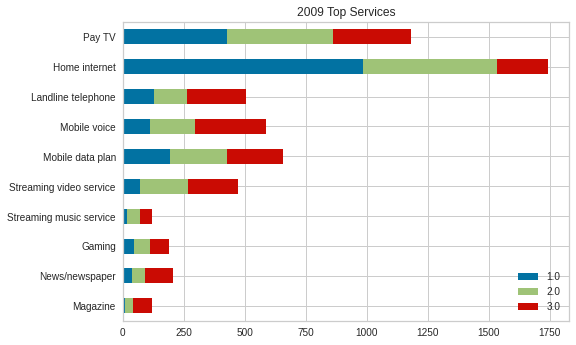

In [23]:
findTopServices(df9, '2009')

                          1.0  2.0  3.0
Home internet            1009  497  197
Pay TV                    425  439  282
Mobile data plan          197  233  226
Landline telephone        135  128  210
Streaming video service   126  270  276
Mobile voice              107  165  250
Gaming                     59  101   90
Streaming music service    36   49   86
Magazine                   25   31   68
News/newspaper             25   61   88


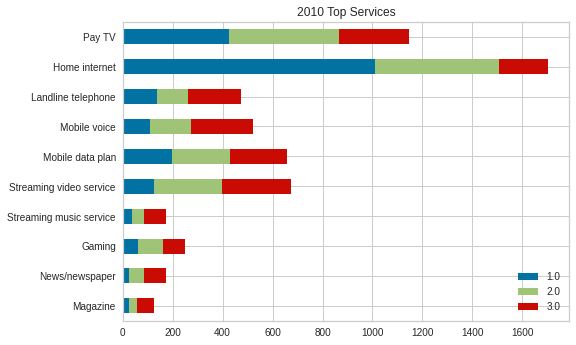

In [24]:
findTopServices(df10, '2010')

                         1.0  2.0  3.0
Home internet            786  444  212
Pay TV                   361  337  263
Mobile data plan         228  230  196
Streaming video service  172  245  251
Landline telephone       147  149  206
Mobile voice             127  147  179
Gaming                    88  110  114
News/newspaper            59   79  113
Streaming music service   42   67   70
Magazine                  40   47   65


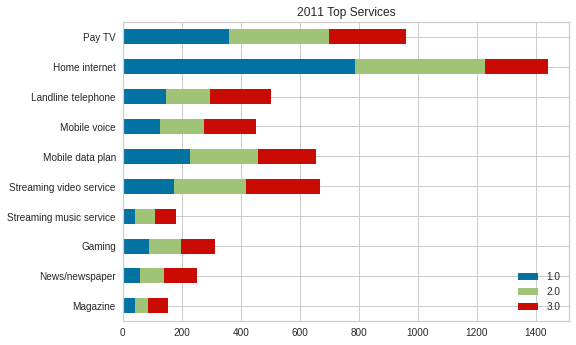

In [25]:
findTopServices(df11, '2011')

In 2010, we see that streaming video services just outperformed mobile data plan in the rankings of 1, 2, and 3. But, when looking just at 1, streaming video was still behind. 

This data shows that streaming video is important to customers, however it is not yet valued as highly as home internet, tv, and phone. 

## Consumers top entertainment

The top forms of entertainment that consumers consume are the following: 
1. Watching television
2. Internet for social or personal interests
3. Listening to music

In [26]:
# Q37: For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.

def findTopEntertainment(df, titleName):
    # Extract Q36 columns
    cols = [col for col in df.columns if 'Q37' in col]
    df37 = df[cols]

    # Rename column names
    mapping = {
        df37.columns[0]: 'Live performances'
        , df37.columns[1]: 'Going to the movies'
        , df37.columns[2]: 'Watching television'
        , df37.columns[3]: 'Listening to music'
        , df37.columns[4]: 'Reading books'
        , df37.columns[5]: 'Reading magazines'
        , df37.columns[6]: 'Reading newspaper'
        , df37.columns[7]: 'Listening to the radio'
        , df37.columns[8]: 'Playing video games'
        , df37.columns[9]: 'Internet for social or personal interests'
        }
    df37 = df37.rename(columns=mapping)

    # Create valued item counts dataframe
    df37Counts = pd.DataFrame()
    for c in df37.columns:
        i = pd.DataFrame(df37[c].value_counts()).transpose()
        df37Counts = pd.concat([i, df37Counts], axis=0)
        
    print(df37Counts.sort_values(by=1, ascending=False))
    df37Counts.plot.barh(stacked=True, title=titleName + ' Top Entertainment')

                                           1.0  2.0  3.0
Watching television                        589  401  317
Internet for social or personal interests  502  453  281
Listening to music                         191  318  304
Live performances                          179  112  141
Reading books                              178  236  218
Playing video games                        168  142  194
Going to the movies                        119  149  201
Reading newspaper                           80  123  168
Listening to the radio                      53   92  129
Reading magazines                           17   50  123


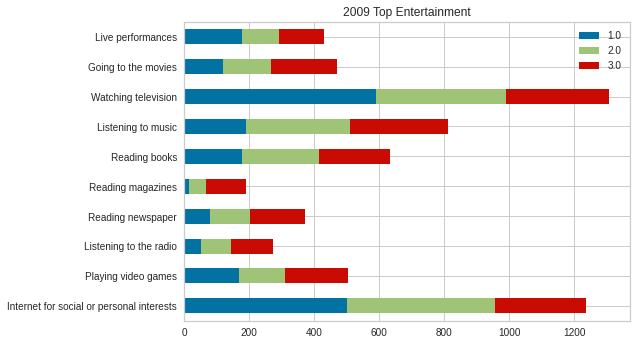

In [27]:
findTopEntertainment(df9, '2009')

                                           1.0  2.0  3.0
Watching television                        564  463  309
Internet for social or personal interests  522  421  326
Playing video games                        206  199  219
Listening to music                         197  307  339
Going to the movies                        195  181  222
Reading books                              194  211  217
Live performances                          146  113  141
Reading newspaper                           84  121  131
Listening to the radio                      67  109  169
Reading magazines                           30   80  132


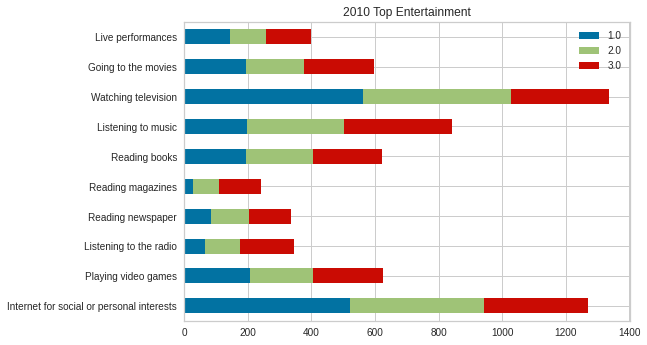

In [28]:
findTopEntertainment(df10, '2010')

                                           1.0  2.0  3.0
Watching television                        570  379  317
Internet for social or personal interests  430  431  323
Listening to music                         208  292  284
Going to the movies                        191  164  217
Reading books                              183  187  199
Playing video games                        175  190  220
Live performances                          147  135  146
Reading newspaper                          110  143  166
Listening to the radio                      74  124  144
Reading magazines                           43   86  115


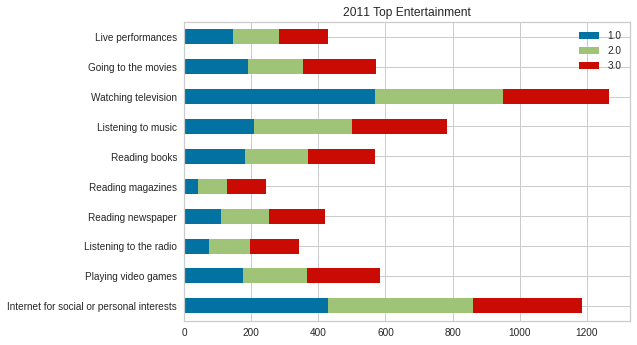

In [29]:
findTopEntertainment(df11, '2011')

Wathching television is consistently the top form of entertainment overall and for #1 choices over all three years. This is promising news for the streaming industry, as television is only growing and innovation in television is likely to be accepted by consumers. 

## How consumers watch movies and television

Streaming is by far the most frequent way consumers watch movies and television year over year.

In [30]:
def findModeOfWatching(df): 
    cols = [col for col in df.columns if 'QNEW19' in col]
    df19 = df[cols]
    mapping = {
            df19.columns[0]: 'Rent physical DVD/Blu-ray'
            , df19.columns[1]: 'Purchase physical DVD/Blu-ray'
            , df19.columns[2]: 'Purchase to download via online service'
            , df19.columns[3]: 'Rent where a digital file is downloaded to your device'
            , df19.columns[4]: 'Watch via an online streaming service'
            , df19.columns[5]: "Purchase/rent via your television service provider"
            }
    df19 = df19.rename(columns=mapping)

    df19Counts = pd.DataFrame()
    for c in df19.columns:
        i = pd.DataFrame(df19[c].value_counts()).transpose()
        df19Counts = pd.concat([i, df19Counts], axis=0)

    df19Counts.sort_values(by='Frequently (every day/weekly)', ascending=False)
    df19Counts.plot.bar(subplots=True, figsize=(10, 15))

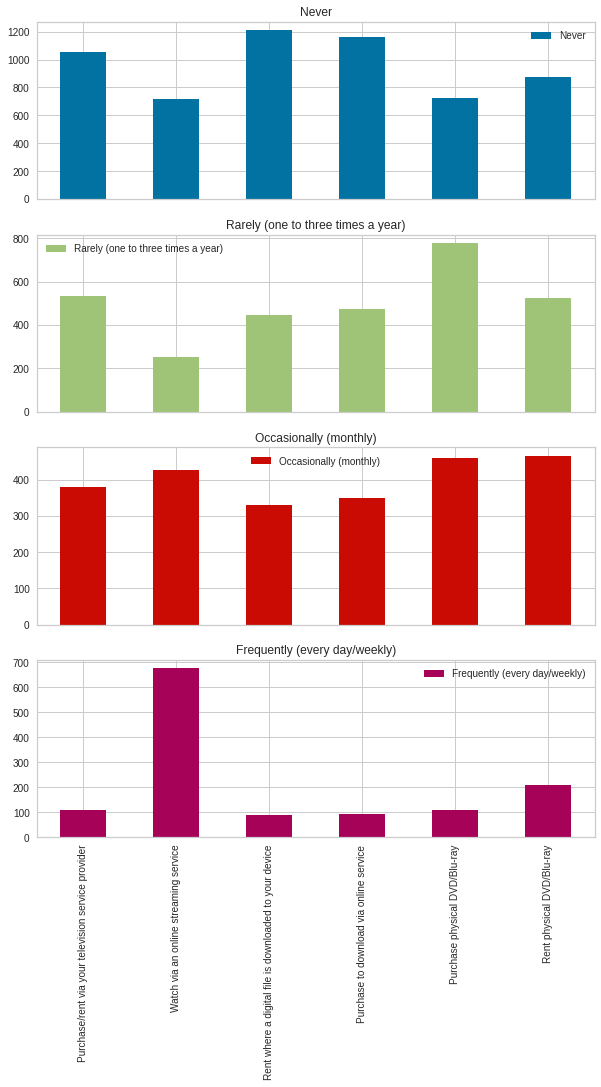

In [31]:
findModeOfWatching(df9)

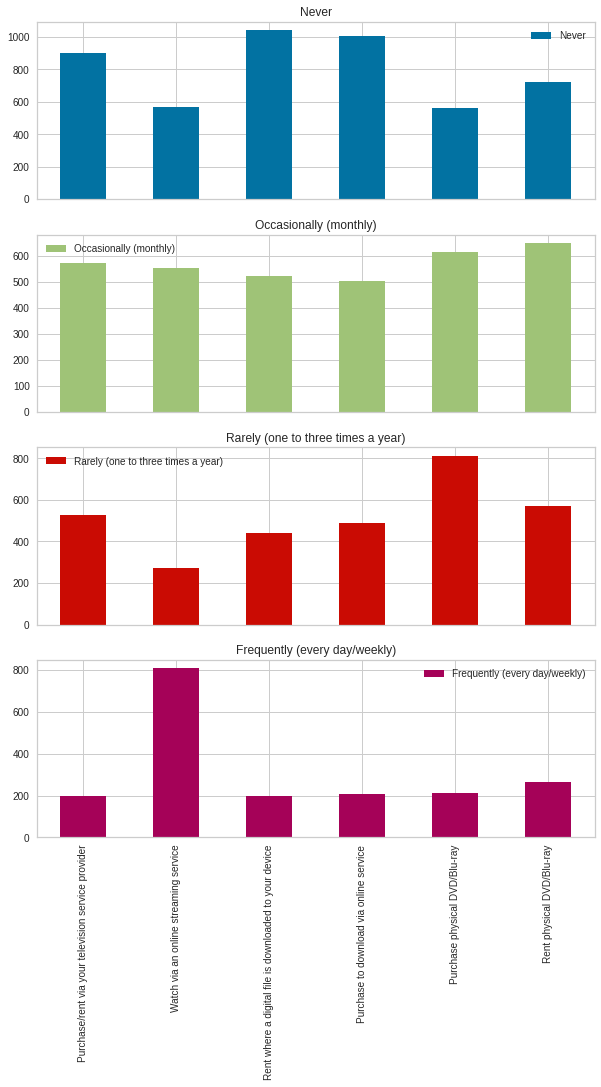

In [32]:
findModeOfWatching(df10)

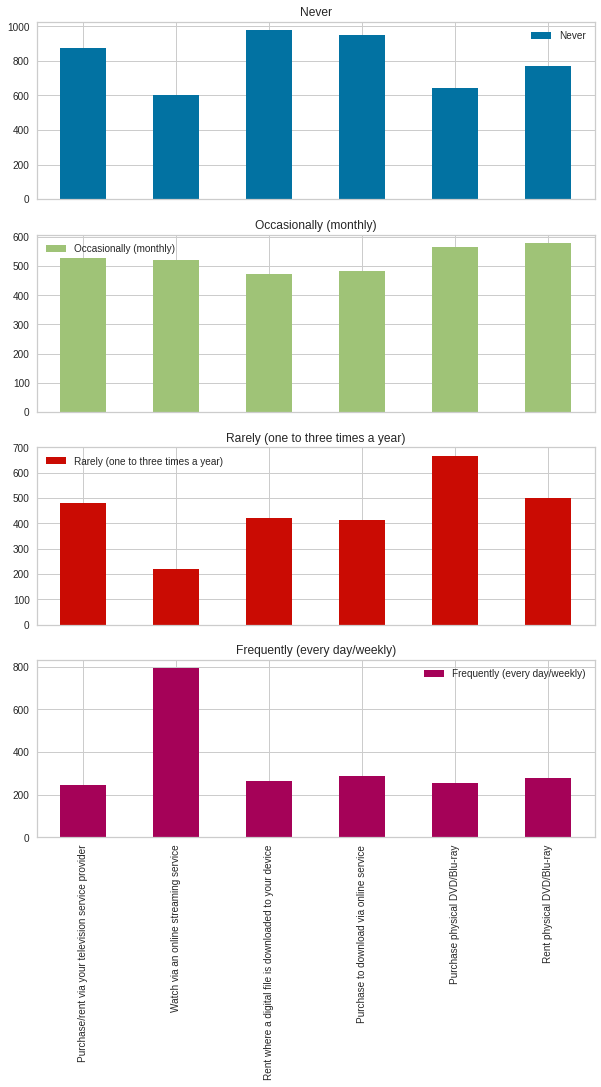

In [33]:
findModeOfWatching(df11)

## EDA Findings

- **Streaming is the most frequent entertainment used by consumers, but it is not valued** as highly as pay TV, internet, or phone. A goal for streaming companies would be to make their streaming services essential, but including content like self-serve news shows and media biographies, so consumers can stay within their platform fully.
- **Increasing trend of purchasing streaming services**. Year over year a larger percentage of consumers are paying for streaming services. This increase is making the streaming market more iteresting for new entrants for niche streaming services. This also is an indicator that majority of people already pay for a streaming service and may not want to buy another one. Streaming companies need to be weary of this when advertising in order to not annoy consumers. 

Things to keep in mind when building models: 
- Training data is 70% white ethnicity. There is a potential for bias if we are applying the models on datasets that do not have the same ethnicity breakdown. 
- Training data has a left skewed age with a spike at ages 60-70 years old. 

# Data Cleaning & Feature Engineering 

## Combining the datasets

In [34]:
# Kelly 
print(df9.shape)
print(df10.shape)
print(df11.shape)

(2076, 193)
(2205, 199)
(2131, 200)


In [35]:
optionsChildren = [ # QNEW2
                   '0-4'
                   , '5-9'
                   , '10-13'
                   , '14-18'
                   , '19-25'
                   , '26+'
                   , "Don't know"
]

optionsMediaEquipment = [ # Q8, Q10, Q11 
             'Flat panel TV'
             , 'DVR'
             , 'Streaming media box'
             , 'Portable thumb drive'
             , 'TV antenna'
             , 'Blu-ray'
             , 'Gaming console'
             , 'Video game player'
             , 'Computer network'
             , 'Desktop'
             , 'Laptop'
             , 'Tablet'
             , 'Laptop/tablet hybrid'
             , 'Small tablet'
             , 'Dedicated e-book'
             , 'Smartphone'
             , 'Large smartphone'
             , 'Basic mobile phone'
             , 'Fitness band'
             , 'Smart watch'
             , 'Smart glasses'
             , 'Virtual reality headset'
             , 'Drone'
             , '3D printer'
             , 'None of the above'
             , "Don't know"
             ]

optionsDevices = [ # Q15, Q16, Q17
                  'Smartphone'
                  , 'Tablet'
                  , 'Laptop/Desktop'
                  , 'Television'
                  ]

optionsApps = [ # Q22
               'Photo/video'
               , 'Banking'
               , 'Fitness/health'
               , 'Social networks'
               , 'Reading books'
               , 'Streaming music'
               , 'Streaming video'
               , 'Reviews/guides'
               , 'News consolidator'
               , 'Newspaper/news broadcaster'
               , 'Magazines'
               , 'Diagnostic/utilities'
               , 'QR Reader'
               , 'Travel'
               , 'Transportation'
               , 'Location'
               , 'Language'
               , 'Movie'
               , 'Food/drink'
               , 'Retail/shopping'
               , 'Navigation'
               , 'Business'
               , 'Games'
               , 'Productivity'
               , 'Sports'
               , 'Weather'
               , 'Browser'
               , 'VOIP'
               , 'Dating'
               , 'Messaging'
               , 'Mobile payment'
               , 'Education'
               , 'Tickets'
               , 'Reservations'
               , 'Special interest/Hobby apps'
               , 'No apps'
               , "Don't know"
              ]

optionsSubsciptions = [ # Q26, Q36
                       'Pay TV'
                       , 'Home internet'
                       , 'Landline telephone'
                       , 'Streaming video service'
                       , 'Streaming music service'
                       , 'Gaming'
                       , 'News/Newspaper '
                       , 'Magazine'
                       , 'None'
                      ]

optionsEntertainment = [ # Q37
                        'Live performances' 
                        , 'Going to the movies'
                        , 'Watching television'
                        , 'Listening to music'
                        , 'Reading books'
                        , 'Reading magazines'
                        , 'Reading newspapers'
                        , 'Listening to the radio'
                        , 'Playing video games'
                        , 'Internet'

]

optionsFrequency = [ # QNEW19, QNEW20
                    'Rent a physical DVD'
                    , 'Purchase a physical DVD'
                    , 'Purchase digital video entertainment'
                    , 'Rent digital video entertainment'
                    , 'Online streaming service'
                    , 'On-Demand'
]

optionsMultiTask = [ # Q73
                    'Read for work and/or school'
                    , 'Read for pleasure'
                    , 'Browse'
                    , 'Microblogging'
                    , 'Read email'
                    , 'Write email'
                    , 'Text message'
                    , 'Social network'
                    , 'Talk on the phone'
                    , 'Browse for products'
                    , 'Purchase products'
                    , 'Play video games'
                    , 'Exercise'
]

optionsStatements = [ # Q39
                     'Pay for games'
                     , 'Pay for music'
                     , 'Pay for TV shows'
                     , 'Pay for movies'
                     , 'Pay for online content'
                     , 'Willing to provide more personal information'
                     , 'Worried'
                     , 'Willing to view advertising'
]

optionsDescriptive = [
                      'Age'
                      , 'Gender'
                      , 'State'
                      , 'Region'
                      , 'Employment'
                      , 'Ethnicity'
]

# ***   ARCHIVED CODE   ***
# optionWillingToPay = [ # Q29 -- NOT NEEDED?
#                       '$5'
#                       , '$10'
#                       , '$20'
#                       , '$30'
#                       , 'Not willing'
#                       , 'Prefer faster speed'
# ]

In [36]:
def cleanDataset(oldDf):
  newDf = pd.DataFrame()

  # Descriptive columns
  for c in oldDf.columns[1:8]:
    for o in optionsDescriptive:
      if o.lower() in c.lower():
        if c == 'age - you are...':  # If age bucket column
          newDf['Age - Bucket'] = oldDf[c]
        else:                        # Else, create normal column
          newDf[o] = oldDf[c]

  # Question columns
  for c in oldDf.columns[8:]:

    # QNEW1 - Children
    if re.search(r'^QNEW1\s', c) != None:
      newDf['QNEW1 - Children'] = oldDf[c]
    
    # QNEW2 - Children, [Type]
    for o in optionsChildren:
      if ('QNEW2' in c) & (o in c):
        newDf['QNEW2 - Children, ' + o] = oldDf[c]

    # Q6 - Income
    if 'Q6' in c:
      newDf['Q6 - Income'] = oldDf[c]

    # Q8, Q10, Q11 - Media equipment
    for o in optionsMediaEquipment: 
      if ('Q8' in c) & (o.lower() in c.lower()):
        newDf['Q8 - Media equipment, Own, ' + o] = oldDf[c]
      if ('Q10' in c) & (o.lower() in c.lower()):
        newDf['Q10 - Media equipment, Plan to purchase, ' + o] = oldDf[c]
      if ('Q11' in c) & (o.lower() in c.lower()):
        newDf['Q11 - Media equipment, Value, ' + o] = oldDf[c]

    # Q15, Q16, Q17 - Devices
    for o in optionsDevices:
      if ('Q15' in c) & (o.lower() in c.lower()):
        newDf['Q15 - Devices, Movies, ' + o] = oldDf[c]
      if ('Q16' in c) & (o.lower() in c.lower()):
        newDf['Q16 - Devices, Sports, ' + o] = oldDf[c]
      if ('Q17' in c) & (o.lower() in c.lower()):
        newDf['Q17 - Devices, TV Shows, ' + o] = oldDf[c]

    # Q22 - Apps
    for o in optionsApps:
      if ('Q22' in c) & (o.lower() in c.lower()):
        newDf['Q22, Apps, ' + o] = oldDf[c]

    # Q26 - Subscriptions
    for o in optionsSubsciptions:
      if ('Q26' in c) & (o.lower() in c.lower()):
        newDf['Q26 - Subscriptions, Own, ' + o] = oldDf[c]
      if ('Q36' in c) & (o.lower() in c.lower()):
        newDf['Q36 - Subscriptions, Value, ' + o] = oldDf[c]

    # Q29 - Willing to pay, Speed
    if ('Q29' in c):
      newDf['Q29 - Willing to pay, Speed'] = oldDf[c]

    # Q37 - Entertainment
    for o in optionsEntertainment:
      if ('Q37' in c) & (o.lower() in c.lower()):
        newDf['Q37 - Entertainment, ' + o] = oldDf[c]

    # QNEW19, QNEW20, QNEW28 - Frequency
    for o in optionsFrequency:
      if ('QNEW19' in c) & (o.lower() in c.lower()):
        newDf['QNEW19 - Frequency watch movies, ' + o] = oldDf[c]
      if ('QNEW20' in c) & (o.lower() in c.lower()):
        newDf['QNEW20 - Frequency watch TV, ' + o] = oldDf[c]
    
    # QNEW24 - Binge
    if ('QNEW24' in c):
      newDf['QNEW24 - Binge'] = oldDf[c]

    if ('QNEW28' in c):
      newDf['QNEW28 - Frequency shared subscription'] = oldDf[c]
    
    # Q73 - Multitasking
    for o in optionsMultiTask:
      if ('Q73' in c) & (o.lower() in c.lower()):
        newDf['Q73 - Multitasking, ' + o] = oldDf[c]

    # Q39 - Willing to Pay
    for o in optionsStatements:
      if ('Q39' in c) & (o.lower() in c.lower()):
        newDf['Q39 - Willing to Pay, ' + o] = oldDf[c]

    # Q89 - News
    if ('Q89' in c):
      newDf['Q89 - News'] = oldDf[c]

  return newDf

In [37]:
# Clean each datasets to rename columns 
df9['Year']=1
df10['Year']=2
df11['Year']=3

cleanDf9 = cleanDataset(df9)
cleanDf10 = cleanDataset(df10)
cleanDf11 = cleanDataset(df11)

# Union merge all datasets 
df = pd.concat([cleanDf9, cleanDf10, cleanDf11])

df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, u

(6412, 195)

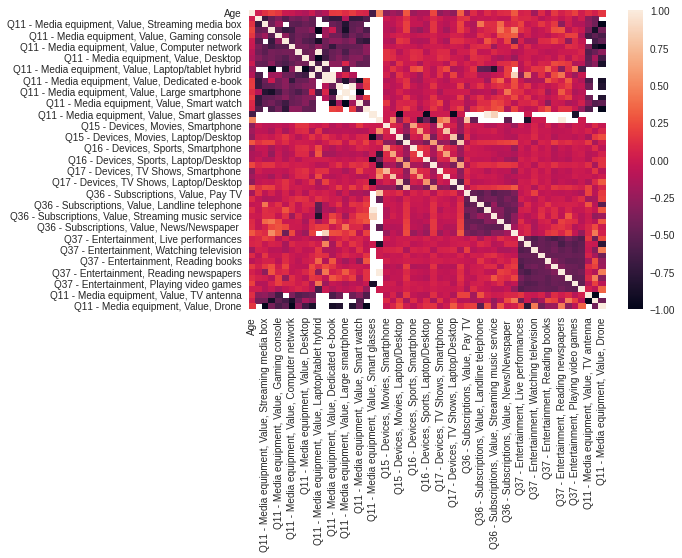

In [38]:
sns.heatmap(df.corr())

## Feature engineering

In [39]:
df.reset_index(drop = True, inplace = True)

In [40]:
# Redefining features
def QNEW1_NEW2_to_combine(data): 
    cols = [col for col in data.columns if 'Children' in col]
    newFeatures = data[cols]

    q1Col = 'QNEW1 - Children'

    q2YoungCols = [
      'QNEW2 - Children, 0-4'   
      , 'QNEW2 - Children, 5-9'
      , 'QNEW2 - Children, 10-13'
      , 'QNEW2 - Children, 14-18'
      ]

    q2OldCols = [
      'QNEW2 - Children, 19-25'
      , 'QNEW2 - Children, 26+'
      ]

    newFeatures['QNEW1 - Children'] = np.where(newFeatures[q1Col] == 'Yes', 1, 0)
    newFeatures['QNEW2 - Children, 0-18'] = np.where(
      ((newFeatures[q2YoungCols[0]] == 'Yes') | (newFeatures[q2YoungCols[1]] == 'Yes') | (newFeatures[q2YoungCols[2]] == 'Yes') |  (newFeatures[q2YoungCols[3]] == 'Yes'))
      , 1, 0) 
    newFeatures['QNEW2 - Children, 19+'] = np.where(
      ((newFeatures[q2OldCols[0]] == 'Yes') | (newFeatures[q2OldCols[1]] == 'Yes'))
      , 1, 0) 
  
    data[['QNEW1 - Children', 'QNEW2 - Children, 0-18', 'QNEW2 - Children, 19+']] = newFeatures[['QNEW1 - Children', 'QNEW2 - Children, 0-18', 'QNEW2 - Children, 19+']]
    data.drop(q2YoungCols, axis = 1, inplace = True)
    data.drop(q2OldCols, axis = 1, inplace = True)
    
    return data

def QNEW3_to_combine(data):
    data_filtered = data.filter(like='Employment')
    data['Employment - Employed or not'] = np.where(data_filtered.isin(['Employed full-time or part-time',
                                                                                               'Self-employed'
                                                                                              ]),1,0)
    data['Employment - Student or not'] = np.where(data_filtered.isin(['Student']),1,0)
    data.drop('Employment', axis = 1, inplace = True)
    
    return data

def Q6_QNEW24_to_combine(data):
    def createBinaryFlag(targetDataFrame, flagName, targetColumn, targetValues):
        targetDataFrame[flagName] = targetDataFrame[targetColumn].apply(lambda x: 1 if x.strip() in targetValues else 0)
    q6 = 'Q6 - Income'

    lowerClass = ['Less than $29,999', '$30,000 to $49,999']
    middleClass = ['$50,000 to $99,999', 'Do not know']
    upperClass = ['$100,000 to $299,999', 'More than $300,000']
    
    createBinaryFlag(data, q6+ ', LowerClass', q6, lowerClass)
    createBinaryFlag(data, q6+ ', MiddleClass', q6, middleClass)
    createBinaryFlag(data, q6+ ', UpperClass', q6, upperClass)
    
    q24 = 'QNEW24 - Binge'
    targetBinger = ['Yes',]
    createBinaryFlag(data, 'BingeWatcher', q24, targetBinger)
    
    data.drop(q6, axis = 1, inplace = True)
    
    return data
  
def Q29_to_combine(data):
    key = ['I am willing to pay $5 per month on top of what I already pay',
           'I am willing to pay $10 per month on top of what I already pay',
           'I am willing to pay $20 per month on top of what I already pay',
           'I am willing to pay $30 or more per month on top of what I already pay',
           'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs',
           'I prefer faster speed but I am unwilling to pay more than I already do'
            ]
    value = [5, 10 , 20, 30, 0, 0]
    dict_WTP = dict(zip(key, value))
    data_filtered = data.filter(like='Q29')
    data.replace({data_filtered.columns[0]:dict_WTP}, inplace = True)
    
    return data

def Q37_to_combine(data):
    data_filtered = data.filter(like='Q37')
    data[data_filtered.columns] = np.where(data_filtered.isin(range(1, 4)),1,0)
    
    return data

In [41]:
# Author : dsiga

def get_cols_by_qno(df,q_string):
  mycols=[]
  for i in df.columns:
    for j in q_string.split(','):
      if j in i:
        mycols.append(i)
  return mycols

def Q8_to_combine(data):
  FinalDF=data
  Q8_cols=get_cols_by_qno(FinalDF,'Q8 -')
  Q8_DF=FinalDF[Q8_cols]
  lowtech_cols=get_cols_by_qno(Q8_DF,'antenna,Basic mobile phone,None of the above')
  hightech_cols=get_cols_by_qno(Q8_DF,'Smart watch,Fitness band,Smart glasse,Virtual reality headset,Drone,3D printer')
  Q8_DF['lowtech']=0
  Q8_DF['hightech']=0

  def conditions_Q8(x):
    a=x[0]
    b=x[1]
    if (a=='Yes' or b==1):
        return 1
    else:
        return 0

  for i in Q8_DF[lowtech_cols].columns:
    mycols=[i,'lowtech']
    Q8_DF['lowtech'] = Q8_DF[mycols].apply(conditions_Q8,axis=1)

  for i in Q8_DF[hightech_cols].columns:
    mycols=[i,'hightech']
    Q8_DF['hightech'] = Q8_DF[mycols].apply(conditions_Q8,axis=1)

  FinalDF['lowtech']=Q8_DF['lowtech']
  FinalDF['hightech']=Q8_DF['hightech']
  FinalDF=FinalDF.drop(columns=hightech_cols+lowtech_cols)
  return FinalDF

def Q26_to_combine(df):

  def streamingPlan(df): 
      if ((df['Q26 - Subscriptions, Own, Streaming video service'] == 'Yes')
          or (df['Q26 - Subscriptions, Own, Streaming music service'] == 'Yes') 
          or (df['Q26 - Subscriptions, Own, Gaming'] == 'Yes')):
          return 1
      else:
          return 0

  df['hasStreamingPlan'] = df.apply(streamingPlan, axis = 1)
  df.drop(columns=get_cols_by_qno(df,'Q26 -'))
  return df


#Question 39
def Q39_to_combine(data):
    
    output = [] 

    for i in range(0,len(data)):
        count = 0
        flag = -1
        for (columnName, columnData) in data.iteritems():
            if('Q39' in columnName):
                if(columnData.values[i] == 'Agree strongly' or columnData.values[i] == 'Agree somewhat'):
                    count += 1

                if count > 2:
                  flag = 1
                else:
                    flag = 0

        output.append(flag)
        
    for col in data.columns:
        if('Q39' in col):
            data.drop(col, axis=1, inplace = True)
    
    data['Potential Premium Customer'] = output
    
    return data


# ***   ARCHIVED CODE   ***
# def Q8_to_combine(data):
#   FinalDF=data
#   Q8_cols=get_cols_by_qno(FinalDF,'Q8 -')
#   Q8_DF=FinalDF[Q8_cols]
#   lowtech_cols=get_cols_by_qno(Q8_DF,'antenna,Basic mobile phone')
#   hightech_cols=get_cols_by_qno(Q8_DF,'Smart watch,Fitness band,Virtual reality headset,Drone')
#   Q8_DF['lowtech']=0
#   Q8_DF['hightech']=0

  # def conditions_Q8(x):
  #   a=x[0]
  #   b=x[1]
  #   if (a=='Yes' or b==1):
  #       return 1
  #   else:
  #       return 0

  # for i in Q8_DF[lowtech_cols].columns:
  #   mycols=[i,'lowtech']
  #   Q8_DF['lowtech'] = Q8_DF[mycols].apply(conditions_Q8,axis=1)

  # for i in Q8_DF[hightech_cols].columns:
  #   mycols=[i,'hightech']
  #   Q8_DF['hightech'] = Q8_DF[mycols].apply(conditions_Q8,axis=1)

  # FinalDF['lowtech']=Q8_DF['lowtech']
  # FinalDF['hightech']=Q8_DF['hightech']
  # FinalDF=FinalDF.drop(columns=hightech_cols+lowtech_cols)
  # return FinalDF

In [42]:
# Feature generation
print("Shape over each question:",df.shape)
df2=QNEW1_NEW2_to_combine(df)

print("Shape over each question:",df2.shape)
df3=QNEW3_to_combine(df2)

print("Shape over each question:",df3.shape)
df4=Q6_QNEW24_to_combine(df3)

print("Shape over each question:",df4.shape)
df5=Q8_to_combine(df4)

print("Shape over each question:",df5.shape)
df6=Q26_to_combine(df5)

print("Shape over each question:",df6.shape)
df61 = Q39_to_combine(df6)

print("Shape over each question:",df61.shape)
df7=Q29_to_combine(df6)

print("Shape over each question:",df7.shape)
combined_df=Q37_to_combine(df7)

print("Shape over each question:",combined_df.shape)

Shape over each question: (6412, 195)
Shape over each question: (6412, 191)
Shape over each question: (6412, 192)
Shape over each question: (6412, 195)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Shape over each question: (6412, 188)
Shape over each question: (6412, 189)
Shape over each question: (6412, 182)
Shape over each question: (6412, 182)
Shape over each question: (6412, 182)


In [43]:
combined_df = combined_df.reindex(sorted(combined_df.columns), axis=1)
combined_df.head()

,Age,Age - Bucket,BingeWatcher,Employment - Employed or not,Employment - Student or not,Ethnicity,Gender,Potential Premium Customer,"Q10 - Media equipment, Plan to purchase, 3D printer","Q10 - Media equipment, Plan to purchase, Basic mobile phone","Q10 - Media equipment, Plan to purchase, Blu-ray","Q10 - Media equipment, Plan to purchase, Computer network","Q10 - Media equipment, Plan to purchase, DVR","Q10 - Media equipment, Plan to purchase, Dedicated e-book","Q10 - Media equipment, Plan to purchase, Desktop","Q10 - Media equipment, Plan to purchase, Don't know","Q10 - Media equipment, Plan to purchase, Drone","Q10 - Media equipment, Plan to purchase, Fitness band","Q10 - Media equipment, Plan to purchase, Gaming console","Q10 - Media equipment, Plan to purchase, Laptop","Q10 - Media equipment, Plan to purchase, Laptop/tablet hybrid","Q10 - Media equipment, Plan to purchase, Large smartphone","Q10 - Media equipment, Plan to purchase, None of the above","Q10 - Media equipment, Plan to purchase, Small tablet","Q10 - Media equipment, Plan to purchase, Smart glasses","Q10 - Media equipment, Plan to purchase, Smart watch","Q10 - Media equipment, Plan to purchase, Smartphone","Q10 - Media equipment, Plan to purchase, Streaming media box","Q10 - Media equipment, Plan to purchase, TV antenna","Q10 - Media equipment, Plan to purchase, Tablet","Q10 - Media equipment, Plan to purchase, Video game player","Q10 - Media equipment, Plan to purchase, Virtual reality headset","Q11 - Media equipment, Value, 3D printer","Q11 - Media equipment, Value, Basic mobile phone","Q11 - Media equipment, Value, Blu-ray","Q11 - Media equipment, Value, Computer network","Q11 - Media equipment, Value, DVR","Q11 - Media equipment, Value, Dedicated e-book","Q11 - Media equipment, Value, Desktop","Q11 - Media equipment, Value, Drone","Q11 - Media equipment, Value, Fitness band","Q11 - Media equipment, Value, Gaming console","Q11 - Media equipment, Value, Laptop","Q11 - Media equipment, Value, Laptop/tablet hybrid","Q11 - Media equipment, Value, Large smartphone","Q11 - Media equipment, Value, Small tablet","Q11 - Media equipment, Value, Smart glasses","Q11 - Media equipment, Value, Smart watch","Q11 - Media equipment, Value, Smartphone","Q11 - Media equipment, Value, Streaming media box","Q11 - Media equipment, Value, TV antenna","Q11 - Media equipment, Value, Tablet","Q11 - Media equipment, Value, Video game player","Q11 - Media equipment, Value, Virtual reality headset","Q15 - Devices, Movies, Laptop/Desktop","Q15 - Devices, Movies, Smartphone","Q15 - Devices, Movies, Tablet","Q15 - Devices, Movies, Television","Q16 - Devices, Sports, Laptop/Desktop","Q16 - Devices, Sports, Smartphone","Q16 - Devices, Sports, Tablet","Q16 - Devices, Sports, Television","Q17 - Devices, TV Shows, Laptop/Desktop","Q17 - Devices, TV Shows, Smartphone","Q17 - Devices, TV Shows, Tablet","Q17 - Devices, TV Shows, Television","Q22, Apps, Banking","Q22, Apps, Browser","Q22, Apps, Business","Q22, Apps, Dating","Q22, Apps, Diagnostic/utilities","Q22, Apps, Don't know","Q22, Apps, Education","Q22, Apps, Fitness/health","Q22, Apps, Food/drink","Q22, Apps, Games","Q22, Apps, Language","Q22, Apps, Location","Q22, Apps, Magazines","Q22, Apps, Messaging","Q22, Apps, Mobile payment","Q22, Apps, Movie","Q22, Apps, Navigation","Q22, Apps, News consolidator","Q22, Apps, Newspaper/news broadcaster","Q22, Apps, Photo/video","Q22, Apps, Productivity","Q22, Apps, QR Reader","Q22, Apps, Reading books","Q22, Apps, Reservations","Q22, Apps, Retail/shopping","Q22, Apps, Reviews/guides","Q22, Apps, Social networks","Q22, Apps, Special interest/Hobby apps","Q22, Apps, Sports","Q22, Apps, Streaming music","Q22, Apps, Streaming video","Q22, Apps, Tickets","Q22, Apps, Transportation","Q22, Apps, Travel","Q22, Apps, VOIP","Q22, Apps, Weather","Q26 - Subscriptions, Own, Gaming","Q26 - Subscriptions, Own, Home internet","Q26 - Subscriptions, Own, Landline telephone","Q26 - Subscriptions, Own, Magazine","Q26 - S

dropping columns which we wont use


In [44]:
cols_to_remove = get_cols_by_qno(combined_df,'QNEW24,BingeWatcher,Potential Premium,Q15,Q17,Q16,Q37,Q10 ,Q8,Q11,Q22,Q26,Q36,Q73,Q89,QNEW19,QNEW20,QNEW28,Age - Bucket,State')
df = combined_df.drop(columns=cols_to_remove)

## Outliers

In [45]:
# Krish
df.describe()

# Age clearly has outliers eg 118
# Q15, Q16 and Q17 have min = -1 as percentage value which is also an outlier
# All the 1-3 ranges look like they dont have outliers but have missing values, but missingness is very subjective and cannot be treated

,Age,Employment - Employed or not,Employment - Student or not,"Q29 - Willing to pay, Speed","Q6 - Income, LowerClass","Q6 - Income, MiddleClass","Q6 - Income, UpperClass",QNEW1 - Children,"QNEW2 - Children, 0-18","QNEW2 - Children, 19+",hasStreamingPlan,hightech,lowtech
count,6412.000000,6412.000000,6412.000000,5189.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,42.640674,0.489863,0.147380,4.874735,0.431379,0.399875,0.168746,0.358546,0.345602,0.037274,0.540237,0.204148,0.351216
std,19.934099,0.499936,0.354512,7.562622,0.495307,0.489911,0.374557,0.479611,0.475601,0.189447,0.498417,0.403109,0.477388
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,118.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# ***   ARCHIVED CODE   ***
# We see that age has outlier. So we find age at 99 percentile. We drop rows above this age and consider this age to be max.
# age = df['Age'].max()

# percent = 0
# while(percent < 1):
#   percent = 100*len(df[df['Age'] > age])/len(df)
#   age -= 1

# df = df[df['Age'] <= age]

# df.describe()

In [47]:
# For Question 15,16 and 17, drop rows having more than 8 value count for -1 among 12 columns
ind = []
for i in range (0, len(df)):
  count = 0
  for col in df.columns:
      if('Q15' in col or 'Q16' in col or 'Q17' in col):
          if df.iloc[i][col] == -1:
            count += 1
  if count > 8:
      ind.append(i)

df = df.drop(df.index[ind])

#Impute zeros in place of -1 for the rest of the rows
for col in df.columns:
  if('Q15' in col or 'Q16' in col or 'Q17' in col):
    df[col] = df[col].replace(-1,0) 

df.describe()

,Age,Employment - Employed or not,Employment - Student or not,"Q29 - Willing to pay, Speed","Q6 - Income, LowerClass","Q6 - Income, MiddleClass","Q6 - Income, UpperClass",QNEW1 - Children,"QNEW2 - Children, 0-18","QNEW2 - Children, 19+",hasStreamingPlan,hightech,lowtech
count,6412.000000,6412.000000,6412.000000,5189.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,42.640674,0.489863,0.147380,4.874735,0.431379,0.399875,0.168746,0.358546,0.345602,0.037274,0.540237,0.204148,0.351216
std,19.934099,0.499936,0.354512,7.562622,0.495307,0.489911,0.374557,0.479611,0.475601,0.189447,0.498417,0.403109,0.477388
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,118.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing Values

In [48]:
# Missingness Treatment

df_dav=df.replace("Yes", 1)
df_dav=df_dav.replace("No", 0)

df_dav=df_dav.replace("Disagree strongly",1) 
df_dav=df_dav.replace("Disagree somewhat",2)
df_dav=df_dav.replace("Agree somewhat",3)
df_dav=df_dav.replace("Agree strongly",4)
df_dav=df_dav.replace("N/A; I do not have a basis to answer",0)

df_dav['Q29 - Willing to pay, Speed'].fillna(df_dav['Q29 - Willing to pay, Speed'].median(), inplace=True)
# df_dav[get_cols_by_qno(df_dav,'Q39')]=df_dav[get_cols_by_qno(df_dav,'Q39')].fillna(0)
df_dav=df_dav.fillna(0)

df_dav.head()
df_dav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6412 entries, 0 to 6411
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           6412 non-null   float64
 1   Employment - Employed or not  6412 non-null   int64  
 2   Employment - Student or not   6412 non-null   int64  
 3   Ethnicity                     6412 non-null   object 
 4   Gender                        6412 non-null   object 
 5   Q29 - Willing to pay, Speed   6412 non-null   float64
 6   Q6 - Income, LowerClass       6412 non-null   int64  
 7   Q6 - Income, MiddleClass      6412 non-null   int64  
 8   Q6 - Income, UpperClass       6412 non-null   int64  
 9   QNEW1 - Children              6412 non-null   int64  
 10  QNEW2 - Children, 0-18        6412 non-null   int64  
 11  QNEW2 - Children, 19+         6412 non-null   int64  
 12  Region                        6412 non-null   object 
 13  has

## Creating Dummy Variables 

In [49]:
# Michael
def Dummify(data):
    object_col = ['Ethnicity','Gender', 'Region', 'State']
    for c in object_col:
        if c in data.columns:
            d = pd.get_dummies(data[c])
            data = data.join(d)
            data.drop(c, axis = 1, inplace = True)
    return data

In [50]:
df_mic = Dummify(df_dav)
df_mic.head()

,Age,Employment - Employed or not,Employment - Student or not,"Q29 - Willing to pay, Speed","Q6 - Income, LowerClass","Q6 - Income, MiddleClass","Q6 - Income, UpperClass",QNEW1 - Children,"QNEW2 - Children, 0-18","QNEW2 - Children, 19+",hasStreamingPlan,hightech,lowtech,African American,Caribbean,East Asian or Southeast Asian,Hispanic,Middle Eastern,Multiracial,"Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Something else not listed here,"South Asian (India, Pakistan, Sri Lanka)",White or Caucasian (Non-Hispanic),Female,Male,Midwest,Northeast,South,West
0,28.0,0,0,10.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,33.0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,24.0,1,0,20.0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,51.0,1,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
4,20.0,0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [51]:
df_mic.describe()

,Age,Employment - Employed or not,Employment - Student or not,"Q29 - Willing to pay, Speed","Q6 - Income, LowerClass","Q6 - Income, MiddleClass","Q6 - Income, UpperClass",QNEW1 - Children,"QNEW2 - Children, 0-18","QNEW2 - Children, 19+",hasStreamingPlan,hightech,lowtech,African American,Caribbean,East Asian or Southeast Asian,Hispanic,Middle Eastern,Multiracial,"Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Something else not listed here,"South Asian (India, Pakistan, Sri Lanka)",White or Caucasian (Non-Hispanic),Female,Male,Midwest,Northeast,South,West
count,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,42.640674,0.489863,0.147380,3.944947,0.431379,0.399875,0.168746,0.358546,0.345602,0.037274,0.540237,0.204148,0.351216,0.111042,0.012789,0.044760,0.105583,0.002807,0.029788,0.010449,0.013100,0.010761,0.658921,0.504523,0.495477,0.203525,0.194323,0.360262,0.241890
std,19.934099,0.499936,0.354512,7.067621,0.495307,0.489911,0.374557,0.479611,0.475601,0.189447,0.498417,0.403109,0.477388,0.314208,0.112370,0.206792,0.307327,0.052913,0.170015,0.101694,0.113714,0.103184,0.474109,0.500019,0.500019,0.402651,0.395710,0.480114,0.428262
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,118.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

In [52]:
# David
Modelling_data = df_mic
Modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6412 entries, 0 to 6411
Data columns (total 29 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Age                                                                               6412 non-null   float64
 1   Employment - Employed or not                                                      6412 non-null   int64  
 2   Employment - Student or not                                                       6412 non-null   int64  
 3   Q29 - Willing to pay, Speed                                                       6412 non-null   float64
 4   Q6 - Income, LowerClass                                                           6412 non-null   int64  
 5   Q6 - Income, MiddleClass                                                          6412 non-null   int64  
 6   

In [53]:
# Create correlation matrix
corr_matrix = Modelling_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['QNEW2 - Children, 0-18', 'Male']

In [54]:
Modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6412 entries, 0 to 6411
Data columns (total 29 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Age                                                                               6412 non-null   float64
 1   Employment - Employed or not                                                      6412 non-null   int64  
 2   Employment - Student or not                                                       6412 non-null   int64  
 3   Q29 - Willing to pay, Speed                                                       6412 non-null   float64
 4   Q6 - Income, LowerClass                                                           6412 non-null   int64  
 5   Q6 - Income, MiddleClass                                                          6412 non-null   int64  
 6   

In [55]:
Modelling_data = Modelling_data.drop(columns=to_drop,errors='ignore')

In [56]:
# Normalizing the values before any outlier treatment
Modelling_data_imputed = Modelling_data.fillna(Modelling_data.median())
Modelling_data_norm = (Modelling_data_imputed-Modelling_data_imputed.mean())/Modelling_data_imputed.std()
Modelling_data_cleaned = Modelling_data_norm.dropna(axis=1, how='all')
Modelling_data_cleaned.shape
# Dimensions reduced to 395

(6412, 27)

In [57]:
# Spliting the train data in features - X_train and labels as - y_train
X = Modelling_data_cleaned.loc[:, Modelling_data_cleaned.columns != 'hasStreamingPlan']
Y = df_dav.loc[:, df_dav.columns == 'hasStreamingPlan']
X.head()

# Check the impact of flipping outcomes
# Y[Y_old==1]=0
# Y[Y_old==0]=1
# Y.value_counts()

,Age,Employment - Employed or not,Employment - Student or not,"Q29 - Willing to pay, Speed","Q6 - Income, LowerClass","Q6 - Income, MiddleClass","Q6 - Income, UpperClass",QNEW1 - Children,"QNEW2 - Children, 19+",hightech,lowtech,African American,Caribbean,East Asian or Southeast Asian,Hispanic,Middle Eastern,Multiracial,"Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Something else not listed here,"South Asian (India, Pakistan, Sri Lanka)",White or Caucasian (Non-Hispanic),Female,Midwest,Northeast,South,West
0,-0.734454,-0.979851,-0.415726,0.856731,-0.870931,1.224968,-0.450522,-0.747578,-0.196751,-0.506434,-0.735705,-0.353402,-0.113808,-0.216448,-0.343553,-0.053054,-0.175208,-0.102751,-0.115205,9.587137,-1.389809,0.990918,-0.505462,-0.491075,-0.750368,1.770203
1,-0.483627,-0.979851,-0.415726,-0.558172,-0.870931,1.224968,-0.450522,1.337445,-0.196751,-0.506434,-0.735705,-0.353402,-0.113808,-0.216448,-0.343553,-0.053054,-0.175208,-0.102751,-0.115205,-0.104290,0.719411,0.990918,-0.505462,2.036031,-0.750368,-0.564819
2,-0.935115,1.020405,-0.415726,2.271635,-0.870931,1.224968,-0.450522,-0.747578,-0.196751,1.974282,1.359029,-0.353402,-0.113808,-0.216448,-0.343553,-0.053054,-0.175208,-0.102751,-0.115205,-0.104290,0.719411,-1.009008,-0.505462,-0.491075,-0.750368,1.770203
3,0.419348,1.020405,-0.415726,-0.558172,-0.870931,-0.816221,2.219300,-0.747578,-0.196751,-0.506434,-0.735705,-0.353402,-0.113808,-0.216448,-0.343553,-0.053054,-0.175208,-0.102751,-0.115205,-0.104290,0.719411,0.990918,-0.505462,2.036031,-0.750368,-0.564819
4,-1.135776,-0.979851,-0.415726,-0.558172,1.148017,-0.816221,-0.450522,-0.747578,-0.196751,-0.506434,-0.735705,2.829199,-0.113808,-0.216448,-0.343553,-0.053054,-0.175208,-0.102751,-0.115205,-0.104290,-1.389809,-1.009008,-0.505462,-0.491075,1.332472,-0.564819


In [58]:
Y.head()

,hasStreamingPlan
0,1
1,0
2,1
3,1
4,0


In [59]:
# Lets make Q4 : income var as target
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=1, stratify=Y)

# Logistic Regression
model_lr = linear_model.LogisticRegression()
model_lr.fit(X_train, y_train)
Y_pred_train = model_lr.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Evaluation

Regular Logistic Regression

In [81]:
# Train Acc
train_accuracy = accuracy_score(y_train,Y_pred_train)
print('acc:',train_accuracy*100)

acc: 74.21501351632355


In [82]:
predictions = model_lr.predict(X_test)
val_accuracy = accuracy_score(y_test,predictions)
print('acc:',val_accuracy*100)

acc: 68.74610106051155


In [83]:
print("train confusion matrix\n",confusion_matrix(y_train, Y_pred_train))
print("validate confusion matrix\n",confusion_matrix(y_test, predictions))

train confusion matrix
 [[1403  808]
 [ 432 2166]]
validate confusion matrix
 [[435 302]
 [199 667]]


Logistic Classifier with gridsearch

In [84]:
# ***   ARCHIVED CODE   ***

# # Grid search cross validation
# Needs to run only for finding best hyperparameters

# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
# logreg=LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=10)
# logreg_cv.fit(X_train, y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [85]:
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(X_train, y_train)

predictions = logreg2.predict(X_test)
val_accuracy=accuracy_score(y_test,predictions)

print('acc:',val_accuracy*100)

acc: 69.18278228321897


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Classifier

In [86]:
# ***   ARCHIVED CODE   ***

# # Evaluate random forest algorithm for classification
# Only needs to run when we needed to find our best Hyperparameters

# # define the model
# rf = RandomForestClassifier()
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(rf, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }
# rfc=RandomForestClassifier(random_state=42)

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [87]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [88]:
Y_pred_train=rfc1.predict(X_train)
pred=rfc1.predict(X_test)

print("Train Accuracy for Random Forest on CV data: ",accuracy_score(y_train,Y_pred_train))
print("Valid Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

print("train confusion matrix\n",confusion_matrix(y_train, Y_pred_train))
print("validate confusion matrix\n",confusion_matrix(y_test, predictions))

Train Accuracy for Random Forest on CV data:  0.7421501351632356
Valid Accuracy for Random Forest on CV data:  0.6899563318777293
train confusion matrix
 [[1403  808]
 [ 432 2166]]
validate confusion matrix
 [[438 299]
 [195 671]]


# Recommendations

In [68]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return fi_df

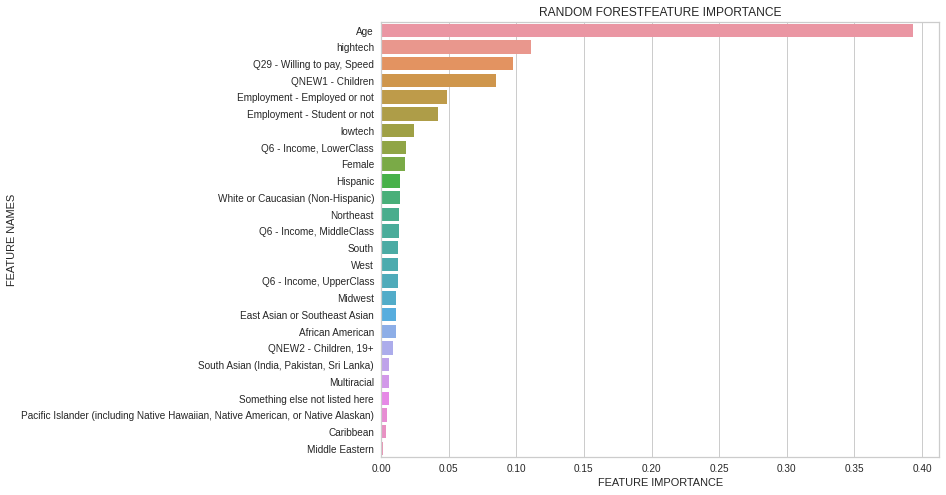

In [69]:
values = plot_feature_importance(rfc1.feature_importances_,X.columns,'RANDOM FOREST')

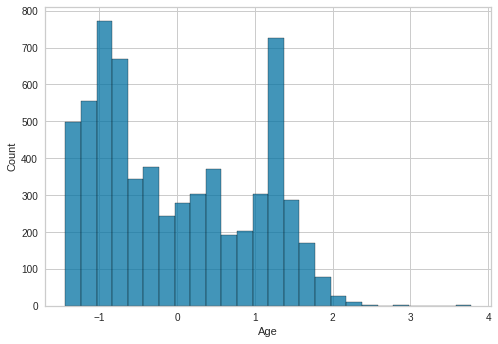

In [70]:
sns.histplot(data=X, x="Age")

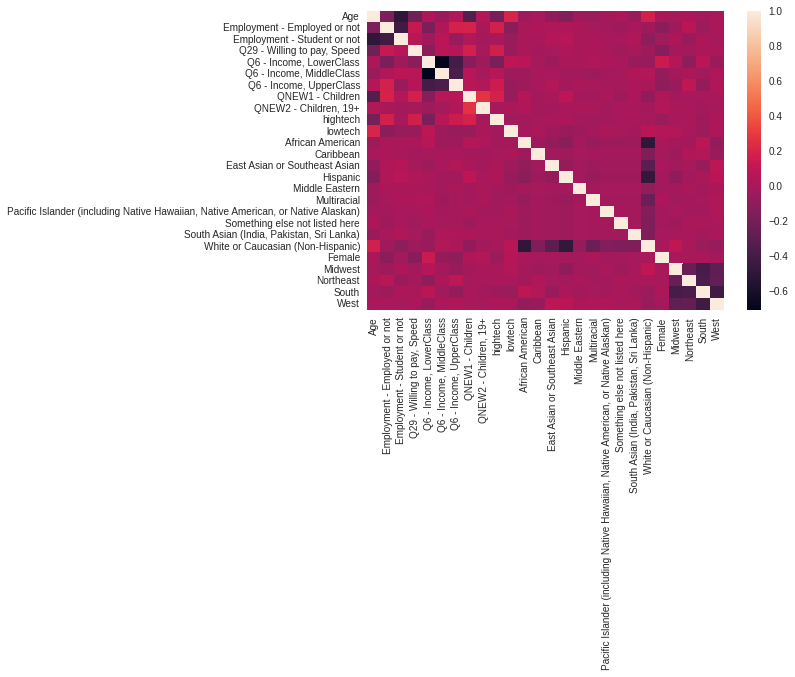

In [71]:
sns.heatmap(X_train.corr())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/yellowbrick/model_selection/importances.py:199: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


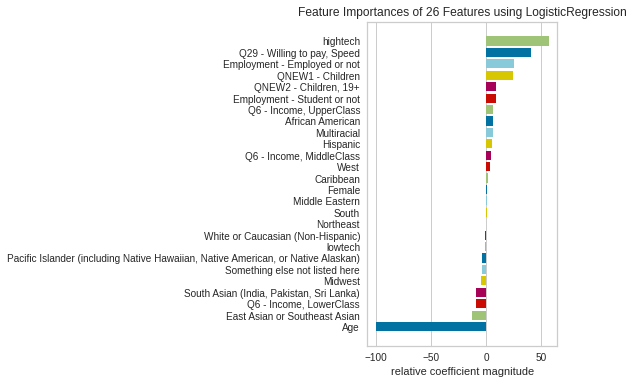

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3bc6cbd90>,
                   estimator=LogisticRegression(C=0.01))

In [72]:
# Use the quick method and immediately show the figure
feature_importances(logreg2,X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


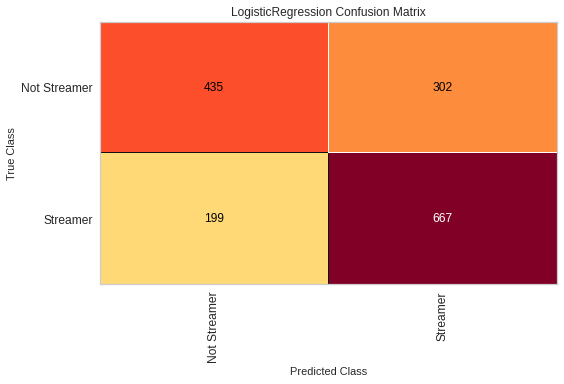

In [73]:
classes=['Not Streamer','Streamer']
cm = ConfusionMatrix(
    model_lr, classes=classes,
    label_encoder={0: 'Not Streamer', 1: 'Streamer'}
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


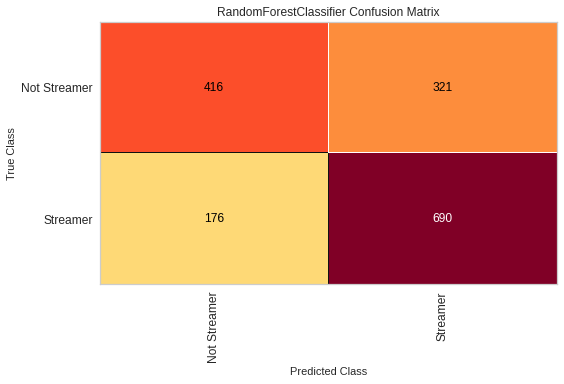

In [74]:
classes=['Not Streamer','Streamer']
cm = ConfusionMatrix(
    rfc1, classes=classes,
    label_encoder={0: 'Not Streamer', 1: 'Streamer'}
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


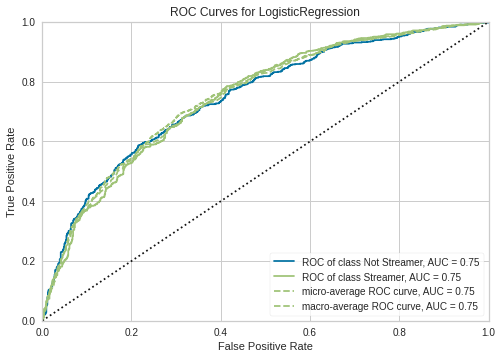

In [75]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(logreg2, classes=['Not Streamer','Streamer'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


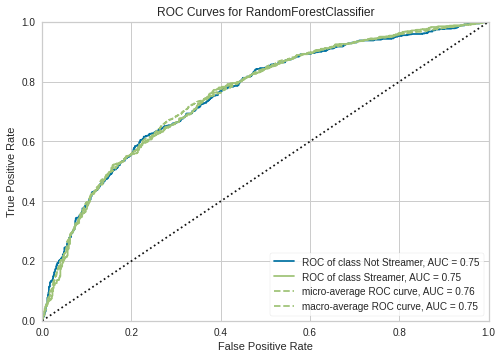

In [76]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(rfc1, classes=['Not Streamer','Streamer'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [77]:
# Avoiding data leaking has helped us generalize our model for future use cases
# Great feature engineering
# Acc of RF and LR are almost similar
# AUC of RF is better than LR 
# we'd go with RF
# A complex model able to generalize and classify better than LR

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


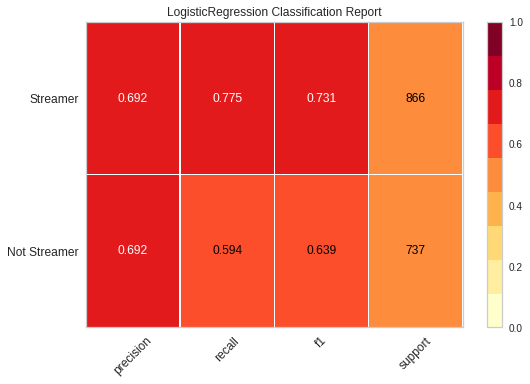

In [78]:
classes=['Not Streamer','Streamer']
visualizer = ClassificationReport(logreg2, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


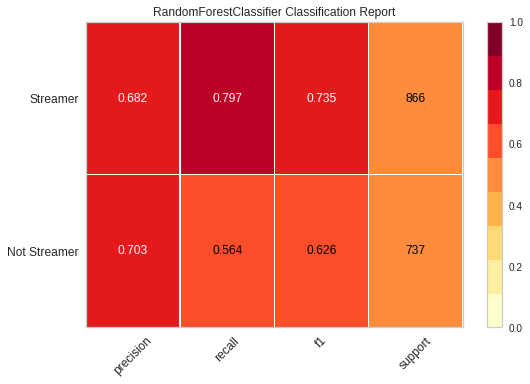

In [80]:
classes=['Not Streamer','Streamer']
visualizer = ClassificationReport(rfc1, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

RFC has better auc,f1,recall hence we picked it.
We have provided findings,insights and recommendations in deck and report